Analysis with the NA12878 dataset. Takes the windows from the DEL labeled windows from all chromosomes. The windows were labeled according to the nanosv calls (Nanopore data), taking into account the confidence interval (CIPOS and CIEND).

## Load dependencies and setting output configuration

In [1]:
import numpy as np
from keras.utils.np_utils import to_categorical
import keras
import gzip
from collections import Counter

%pylab inline
%load_ext autoreload
%autoreload 2

Using TensorFlow backend.


Populating the interactive namespace from numpy and matplotlib


## Load data from npy files

In [2]:
# sample_name = 'NA12878'

#date = '230718'
#date = '060818'
#date = '111018'
#win = '50bp'

date = '091118'
win = ''

basedir = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/'


In [3]:
# Load channel data and labels by chromosome

#Leaving out chromosome Y and MT for the moment
chr_list = list(map(str, np.arange(1,23)))
chr_list.append('X')
print(chr_list)

data = dict()
labels = dict()

for svmode in ['INDEL', 'DUP', 'INV', 'TRA']:
    data[svmode] = []
    labels[svmode] = []
    
    print(svmode)
    

    for sample in ['G1', 'N1']:
    #for i in [16, 17, 18]:
        
        print('Loading data and labels for sample %s' % sample)
        
        datapath=basedir+date+'/'+win+'/TrainingData_'+date+'/'+svmode+'/'+sample+'/ChannelData/'
        datapath_labels = basedir+date+'/'+win+'/TrainingData_'+date+'/'+svmode+'/'+sample+'/LabelData/'
    
        data_file = datapath + sample + '.npy.gz'
        with gzip.GzipFile(data_file, "rb") as f:
            data_mat = np.load(f)
            data[svmode].extend(data_mat)
        f.close()
        
        data_file = datapath_labels + sample + '_17_label.npy.gz'
        with gzip.GzipFile(data_file, "rb") as f:
            labels_partial = np.load(f)
            labels[svmode].extend(labels_partial)
        f.close()
        
    data[svmode] = np.array(data[svmode])
    labels[svmode] = np.array(labels[svmode])
    print(data[svmode].shape)
    print(labels[svmode].shape)
    assert data[svmode].shape[0] == labels[svmode].shape[0]
    


['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X']
INDEL
Loading data and labels for sample G1
Loading data and labels for sample N1
(39647, 38, 200)
(39647,)
DUP
Loading data and labels for sample G1
Loading data and labels for sample N1
(29652, 38, 200)
(29652,)
INV
Loading data and labels for sample G1
Loading data and labels for sample N1
(58870, 38, 200)
(58870,)
TRA
Loading data and labels for sample G1
Loading data and labels for sample N1
(184172, 38, 200)
(184172,)


In [19]:
for svmode in ['INDEL', 'DUP', 'INV', 'TRA']:
    print(Counter(labels[svmode]))

Counter({'noSV': 20084, 'INS_pos': 10071, 'DEL_end': 4768, 'DEL_start': 4724})
Counter({'noSV': 19960, 'DUP_start': 4847, 'DUP_end': 4845})
Counter({'noSV': 19960, 'INV_end': 19463, 'INV_start': 19447})
Counter({'noSV': 110280, 'TRA_end': 36972, 'TRA_start': 36920})


In [7]:
sample_name = 'PATIENT1'

#date = '230718'
#date = '060818'
#date = '111018'
#win = '50bp'

date = '091118'
win = ''

#basedir = '/hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/'
basedir = '/hpc/cog_bioinf/ridder/users/lsantuari/Data_for_eScienceCenter/sonja_georgievska/'
datapath=basedir+date+'/'+win+'/TestData_'+date+'/'+sample_name+'/ChannelData/'
datapath_labels = basedir+date+'/'+win+'/TestData_'+date+'/'+sample_name+'/MultiLabelData/'

#basedir = '/hpc/cog_bioinf/ridder/users/lsantuari/Git/DeepSV_runs/310518/CNN/scripts/'
#datapath=basedir+'/TestData_'+date+'/'+sample_name+'/ChannelData/'
#datapath_labels = basedir+'/TestData_'+date+'/'+sample_name+'/LabelData/'

#filename = '_channel_maker_real_germline.npy.gz'

In [8]:
# Load channel data and labels by chromosome

#Leaving out chromosome Y and MT for the moment
chr_list = list(map(str, np.arange(1,23)))
chr_list.append('X')

#chr_list = ['22']
print(chr_list)

data = []

for i in chr_list:
#for i in [16, 17, 18]:
    
    print('Loading data and labels for Chr%s' % i)
    data_file = datapath + sample_name + '_' + str(i) + '.npy.gz'
    with gzip.GzipFile(data_file, "rb") as f:
        data_mat = np.load(f)
        data.extend(data_mat)
    f.close()

data = np.array(data)
print(data.shape)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', 'X']
Loading data and labels for Chr1
Loading data and labels for Chr2
Loading data and labels for Chr3
Loading data and labels for Chr4
Loading data and labels for Chr5
Loading data and labels for Chr6
Loading data and labels for Chr7
Loading data and labels for Chr8
Loading data and labels for Chr9
Loading data and labels for Chr10
Loading data and labels for Chr11
Loading data and labels for Chr12
Loading data and labels for Chr13
Loading data and labels for Chr14
Loading data and labels for Chr15
Loading data and labels for Chr16
Loading data and labels for Chr17
Loading data and labels for Chr18
Loading data and labels for Chr19
Loading data and labels for Chr20
Loading data and labels for Chr21
Loading data and labels for Chr22
Loading data and labels for ChrX
(1078694, 38, 200)


In [6]:
data = np.array(data)
print(data.shape)

(1078694, 38, 200)


In [77]:
#chr_list = list(map(str, np.arange(1,23)))
#chr_list.append('X')
# print(chr_list)

label_file = datapath_labels + 'labels.pickle.gz'

with gzip.GzipFile(label_file, "rb") as f:
    labels_dict = np.load(f)
f.close()

print(labels_dict.keys())

for k in labels_dict.keys():
    if k !='id':
        print(k)
        for i in chr_list:
            print(str(i), Counter(labels_dict[k][i]))

dict_keys(['nanosv', 'nanosv_manta', 'manta', 'delly', 'lumpy', 'gridss', 'Mills2011', 'Mills2011_nanosv', 'nanosv_Mills2011', 'Mills2011_nanosv_manta', 'Mills2011_PacBio_Moleculo', 'Mills2011_PacBio_Moleculo_nanosv', 'nanosv_Mills2011_PacBio_Moleculo', 'Mills2011_PacBio_Moleculo_nanosv_manta', 'Mills2011_PacBio_Moleculo_Lumpy_GASVPro_DELLY_Pindel', 'id'])
nanosv
1 Counter({'noSV': 88124, 'UK': 1935, 'DEL_start': 415, 'DEL_end': 387})
2 Counter({'noSV': 89195, 'UK': 8448, 'DEL_end': 804, 'DEL_start': 516})
3 Counter({'noSV': 65734, 'UK': 691, 'DEL_start': 275, 'DEL_end': 260})
4 Counter({'noSV': 71275, 'UK': 9109, 'DEL_end': 1401, 'DEL_start': 512})
5 Counter({'noSV': 56055, 'UK': 609, 'DEL_start': 247, 'DEL_end': 238})
6 Counter({'noSV': 61029, 'UK': 667, 'DEL_end': 292, 'DEL_start': 257})
7 Counter({'noSV': 65160, 'UK': 1427, 'DEL_end': 453, 'DEL_start': 361})
8 Counter({'noSV': 47364, 'UK': 1662, 'DEL_end': 397, 'DEL_start': 204})
9 Counter({'noSV': 46775, 'UK': 581, 'DEL_start': 22

12 Counter({'noSV': 51242, 'UK': 193, 'DEL_end': 94, 'DEL_start': 78})
13 Counter({'noSV': 31833, 'UK': 98, 'DEL_start': 80, 'DEL_end': 74})
14 Counter({'noSV': 31168, 'UK': 147, 'DEL_start': 47, 'DEL_end': 35})
15 Counter({'noSV': 29857, 'UK': 115, 'DEL_start': 59, 'DEL_end': 45})
16 Counter({'noSV': 55125, 'UK': 1533, 'DEL_start': 139, 'DEL_end': 52})
17 Counter({'noSV': 40560, 'UK': 573, 'DEL_end': 41, 'DEL_start': 40})
18 Counter({'noSV': 31148, 'UK': 1882, 'DEL_end': 221, 'DEL_start': 186})
19 Counter({'noSV': 40414, 'UK': 189, 'DEL_end': 54, 'DEL_start': 49})
20 Counter({'noSV': 27922, 'UK': 100, 'DEL_start': 54, 'DEL_end': 42})
21 Counter({'noSV': 27923, 'UK': 433, 'DEL_end': 55, 'DEL_start': 48})
22 Counter({'noSV': 16911, 'UK': 398, 'DEL_end': 49, 'DEL_start': 36})
X Counter({'noSV': 47732, 'UK': 84, 'DEL_start': 46, 'DEL_end': 39})
Mills2011_nanosv
1 Counter({'noSV': 90499, 'UK': 140, 'DEL_start': 121, 'DEL_end': 101})
2 Counter({'noSV': 98610, 'UK': 148, 'DEL_start': 109, 'D

14 Counter({'noSV': 31286, 'DEL_start': 48, 'DEL_end': 38, 'UK': 25})
15 Counter({'noSV': 29993, 'DEL_end': 34, 'DEL_start': 33, 'UK': 16})
16 Counter({'noSV': 56769, 'DEL_end': 33, 'DEL_start': 29, 'UK': 18})
17 Counter({'noSV': 41132, 'DEL_end': 40, 'DEL_start': 35, 'UK': 7})
18 Counter({'noSV': 33327, 'DEL_end': 49, 'DEL_start': 44, 'UK': 17})
19 Counter({'noSV': 40637, 'DEL_end': 33, 'DEL_start': 32, 'UK': 4})
20 Counter({'noSV': 28046, 'DEL_end': 31, 'DEL_start': 29, 'UK': 12})
21 Counter({'noSV': 28417, 'DEL_start': 18, 'DEL_end': 17, 'UK': 7})
22 Counter({'noSV': 17363, 'DEL_start': 14, 'DEL_end': 12, 'UK': 5})
X Counter({'noSV': 47800, 'DEL_end': 43, 'DEL_start': 39, 'UK': 19})
Mills2011_PacBio_Moleculo_nanosv_manta
1 Counter({'noSV': 90596, 'UK': 95, 'DEL_start': 92, 'DEL_end': 78})
2 Counter({'noSV': 98717, 'UK': 97, 'DEL_start': 80, 'DEL_end': 69})
3 Counter({'noSV': 66726, 'DEL_start': 91, 'DEL_end': 76, 'UK': 67})
4 Counter({'noSV': 82044, 'DEL_start': 91, 'DEL_end': 90, '

In [26]:
%%time
# Save data and labels

use_gz = False
labels_only = False

if use_gz:

    if not labels_only:
        data_output_file = datapath + '../X.npy.gz'
        with gzip.GzipFile(data_output_file, "wb") as f:
            np.save(f, data)
        f.close()

    label_output_file = datapath + '../y.npy.gz'
    with gzip.GzipFile(label_output_file, "wb") as f:
        np.save(f, labels_dict)
    f.close()

else:
    #No gz
    if not labels_only:
        data_output_file_npy = datapath + '../X'
        np.save(data_output_file_npy, data)

    label_output_file_npy = datapath + '../y'
    np.save(label_output_file_npy, labels_dict)

CPU times: user 3.85 s, sys: 52.7 s, total: 56.6 s
Wall time: 12min 1s


In [71]:
%%time
# Load data and labels

use_gz = True

if use_gz:
    
    data_output_file = datapath + '../X.npy.gz'
    with gzip.GzipFile(data_output_file, "rb") as f:
        data = np.load(f)
    f.close()

    label_output_file = datapath + '../y.npy.gz'
    with gzip.GzipFile(label_output_file, "rb") as f:
        labels_dict = np.load(f)
    f.close()

else:
        
    data_output_file_npy = datapath + '../X.npy'
    data = np.load(data_output_file_npy)

    label_output_file_npy = datapath + '../y.npy'
    labels_dict = np.load(label_output_file_npy)

CPU times: user 6min 23s, sys: 51.8 s, total: 7min 15s
Wall time: 8min 6s


In [72]:
#labels_dict = labels
data_original = data

In [279]:
#idx = np.arange(0,9)
#idx = np.append(idx, [17,26,27,28,36,37], 0)
#idx = np.append(idx, [27,28,36,37], 0)

idx = np.arange(0,4)
idx = np.append(idx, [27,28], 0)
print(idx)
#print(data[:,idx,:].shape)

data = data_original[:,idx,:]

[ 0  1  2  3 27 28]


In [280]:
print(data.shape)

(1185753, 6, 200)


In [281]:
labels_svcaller = dict()
#label_type = 'nanosv_Mills2011'

for label_type in ['manta', 'gridss', 'lumpy', 'delly']:
    labels_svcaller[label_type] = []
    for chr in chr_list:
        labels_svcaller[label_type].extend(labels_dict[label_type][chr])
    labels_svcaller[label_type] = np.array(labels_svcaller[label_type])
    
# labels = []
# for i in np.arange(len(labels_svcaller['manta'])):
#     if labels_svcaller['manta'][i] == labels_svcaller['gridss'][i] or \
#         labels_svcaller['manta'][i] == labels_svcaller['lumpy'][i] or \
#         labels_svcaller['manta'][i] == labels_svcaller['delly'][i]:
#             labels.append(labels_svcaller['manta'][i])
#     else:
#         labels.append('UK')



manta_gridss = (labels_svcaller['manta']==labels_svcaller['gridss'])
lumpy_delly = (labels_svcaller['lumpy']==labels_svcaller['delly'])
manta_gridss_lumpy_delly = (manta_gridss == lumpy_delly)

print(Counter(manta_gridss_lumpy_delly))

labels = []
for i in np.arange(len(labels_svcaller['manta'])):
    if manta_gridss_lumpy_delly[i]:
            labels.append(labels_svcaller['manta'][i])
    else:
        labels.append('UK')

print(Counter(labels_svcaller['manta']))
print(Counter(labels))

assert len(labels_svcaller['manta']) == len(labels)

Counter({True: 1144609, False: 41144})
Counter({'noSV': 1170019, 'UK': 6839, 'DEL_start': 4456, 'DEL_end': 4439})
Counter({'noSV': 1139786, 'UK': 43203, 'DEL_start': 1406, 'DEL_end': 1358})


In [282]:
keep = np.where(np.array(labels)!='UK')

# If loaded:
#keep = np.where(labels!='UK')

#print(keep)

#print(data.shape())
#print(len(labels))

data = np.array(data)
labels = np.array(labels)

print(data.shape)
print(len(labels))

data = data[keep]
labels = labels[keep]

(1185753, 6, 200)
1185753


In [278]:
n_windows = 30
number_channels = data.shape[1]
label = ["None"] * number_channels

# Fill labels for legend

label[0] = "coverage"
label[1] = "#left clipped reads"
label[2] = "#right clipped reads"
label[3] = "INV_before"
label[4] = "INV_after"
label[5] = "DUP_before"
label[6] = "DUP_after"
label[7] = "TRA_opposite"
label[8] = "TRA_same"

i = 9
for direction in ['F','R']:
    for clipped in ['L','R','U']:
        for value in ['sum', 'num', 'median']:
            label[i] = direction+'_'+clipped+'_CR_'+value
            i = i+1

label[i] = "#left split reads"
i = i+1
label[i] = "#right split reads"
i = i+1

for clipped in ['L','R']:
    for value in ['sum', 'num', 'median']:
        label[i] = clipped+'_SR_'+value
        i = i+1
        
label[i] = "GC"
i = i+1
label[i] = "Mappability"
i = i+1
label[i] = "One_hot_Ncoding"

for k,l in enumerate(label):
    print(str(k)+':'+l)

IndexError: list assignment index out of range

In [29]:
import math
import matplotlib.pyplot as plt


def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows):
        #print(y_train[i], 'id:', i)
        #for j in range (number_channels-1, -1, -1):
        for j in range (number_channels-1, -1, -1):
            shift = 0
            start = 0
            #if j in [0,1,4,5]:
                #shift = -60
            #if j in [4,5,6,7]:
                #start = 70
            #print(X_train[i][j])
            if sum(data[i][j])!=0:
                X_win = (data[i][j]-min(data[i][j]))/max(data[i][j])
            else:
                X_win = data[i][j]
            #Z = [start + shift + x + 5*j*4 for x in X_train[i][j]] 
            Z = [start + shift + x + j for x in X_win] 
            #plt.ylim([0,600])
            plt.ylim([0, number_channels])
            plt.plot(Z, label = label[j], linewidth=2)
            plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 10})
        plt.show()

3168


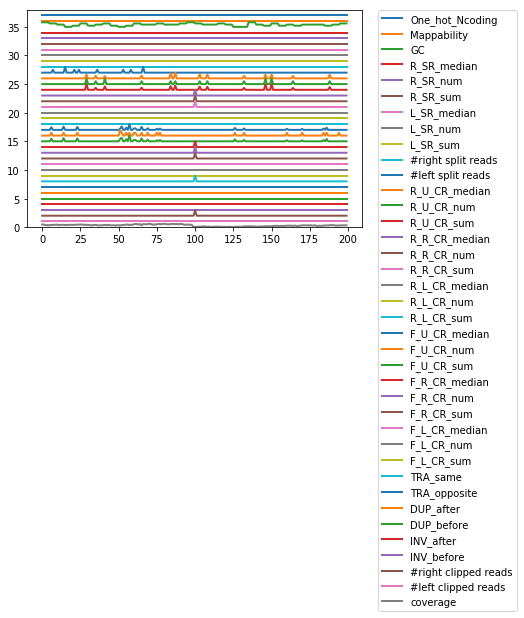

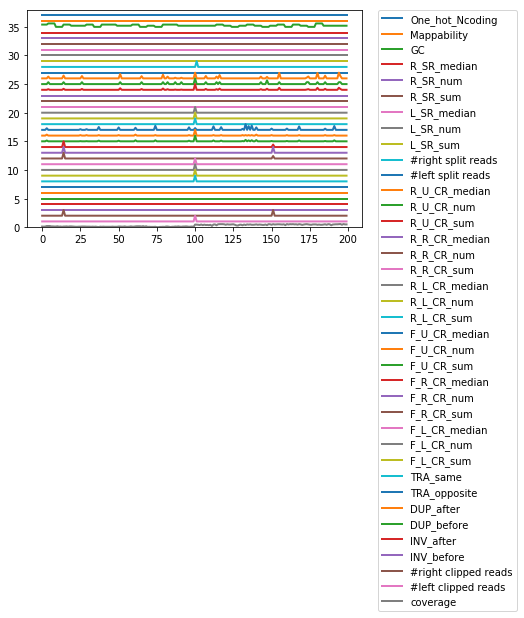

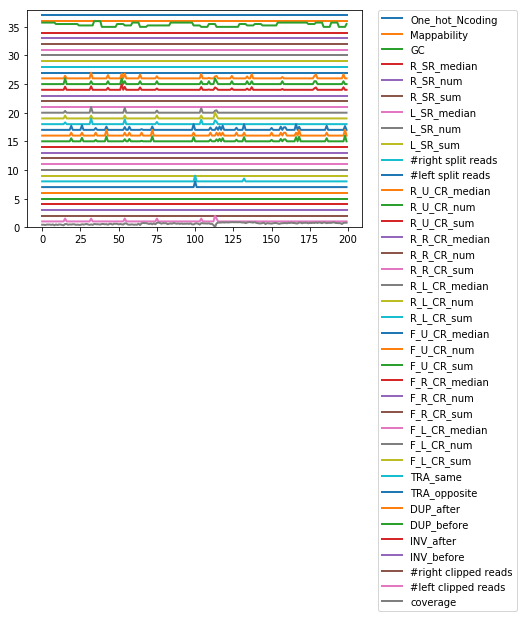

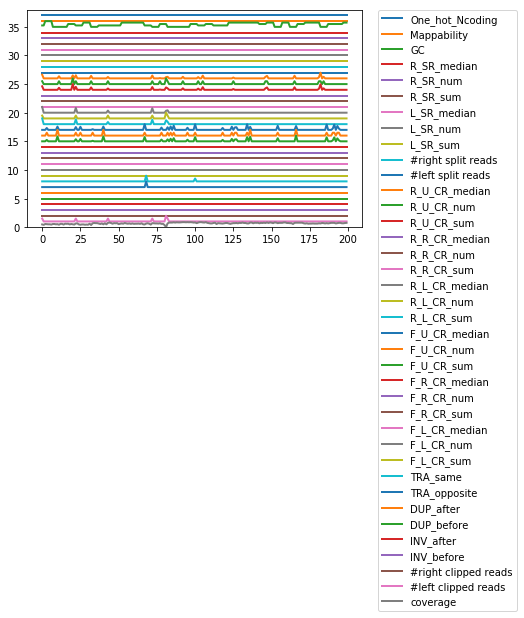

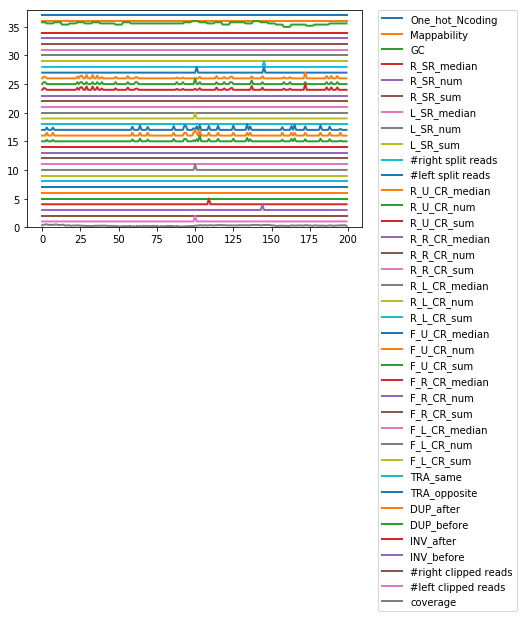

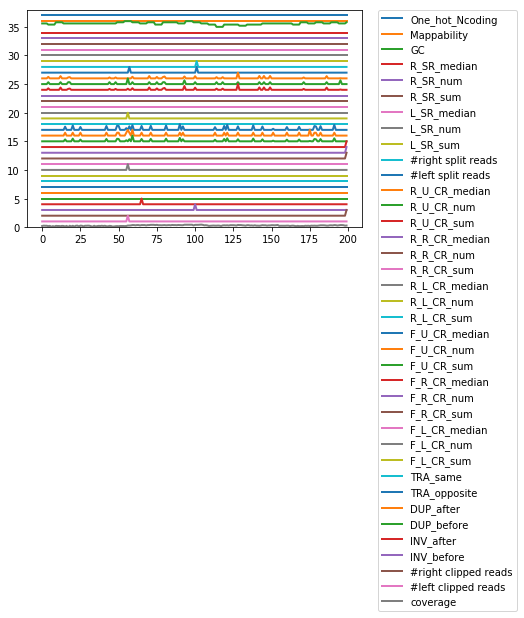

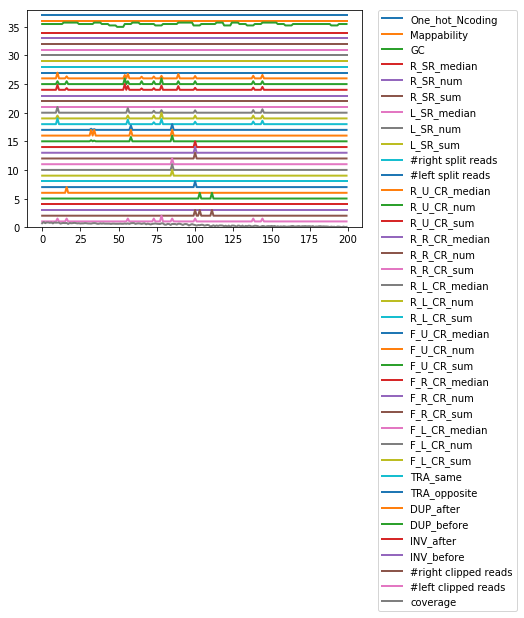

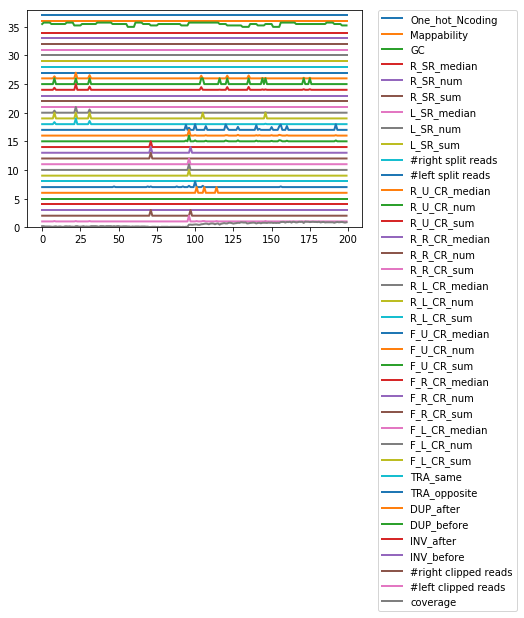

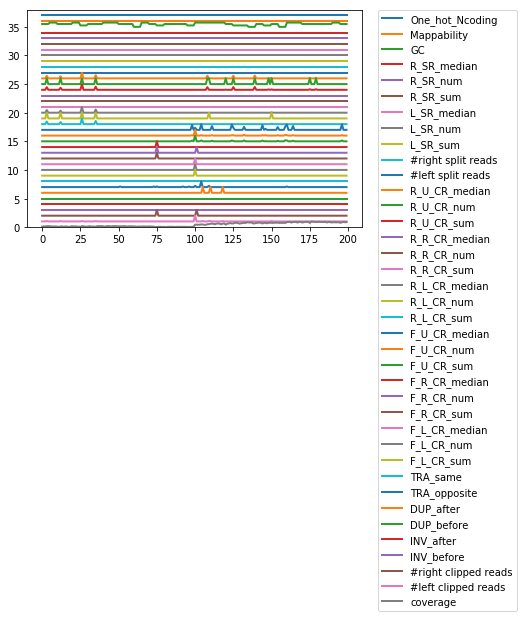

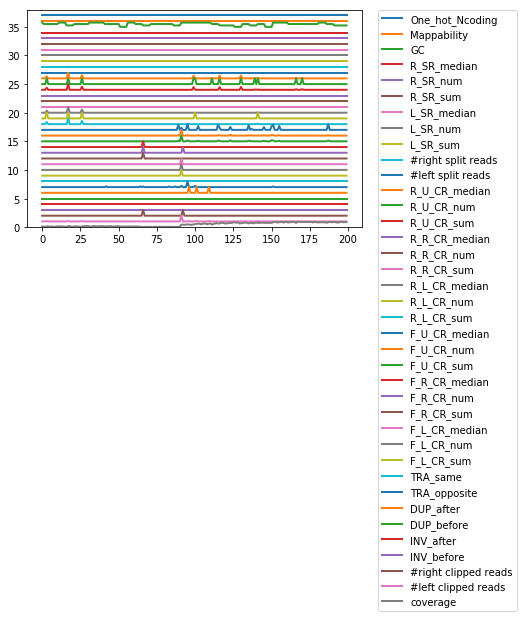

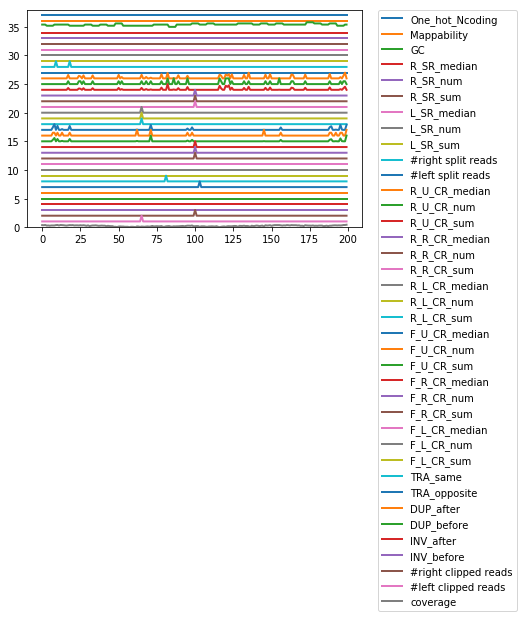

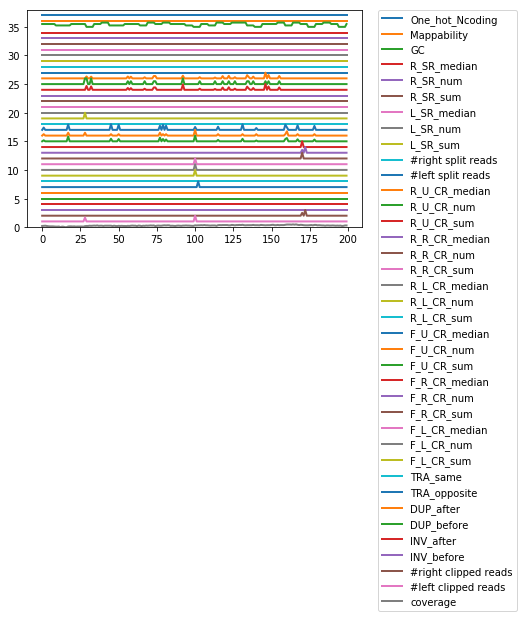

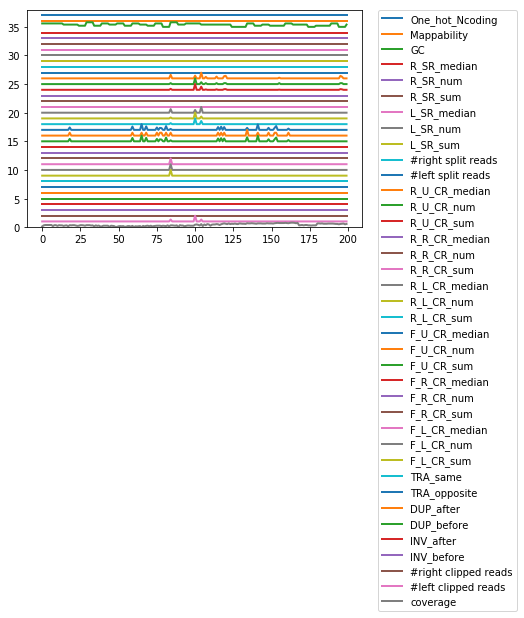

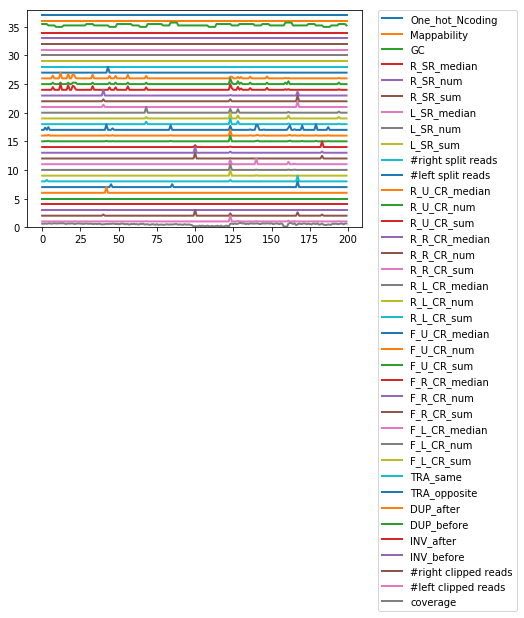

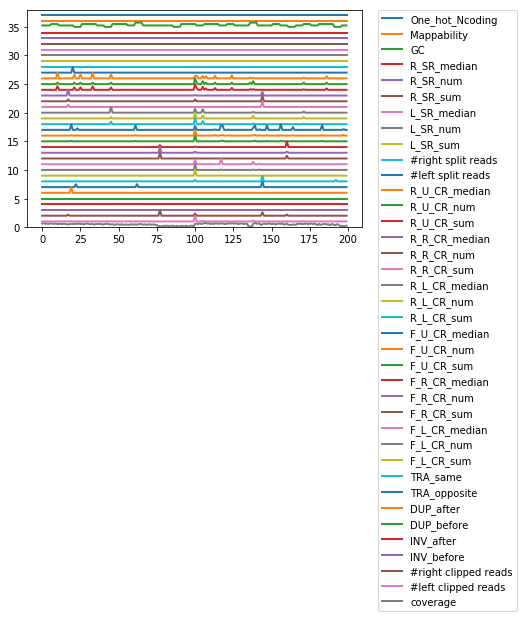

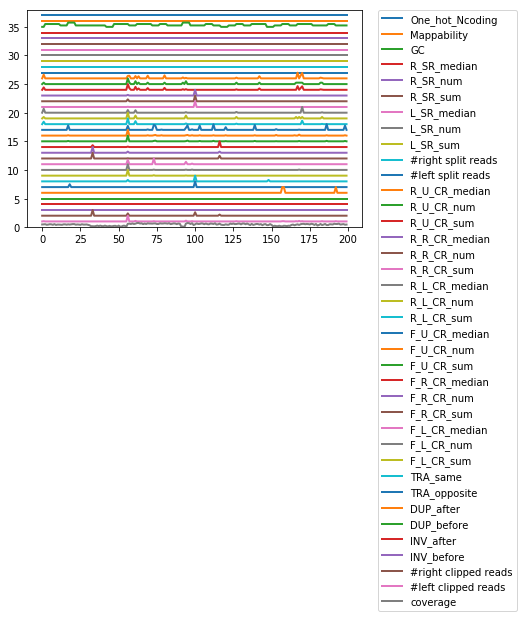

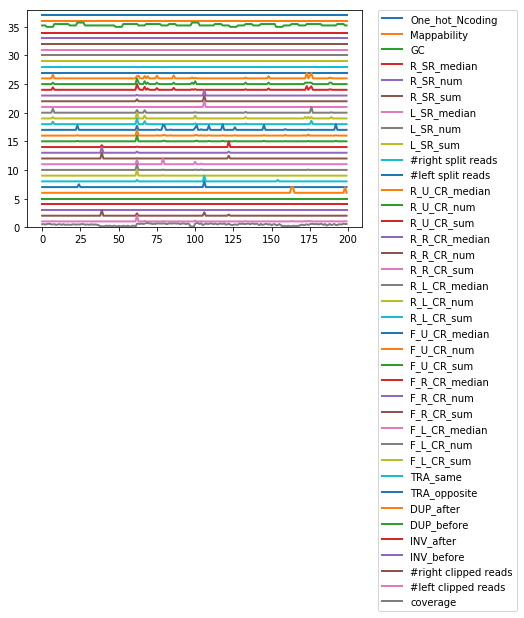

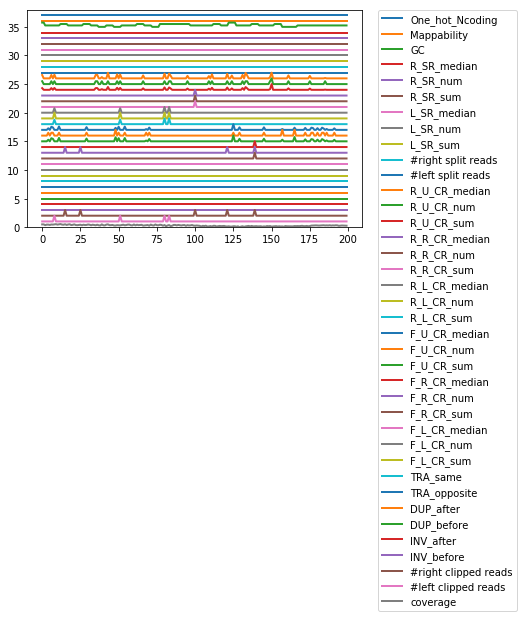

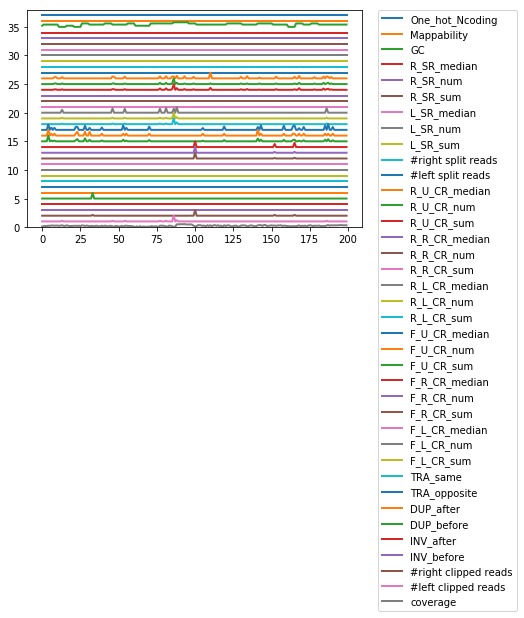

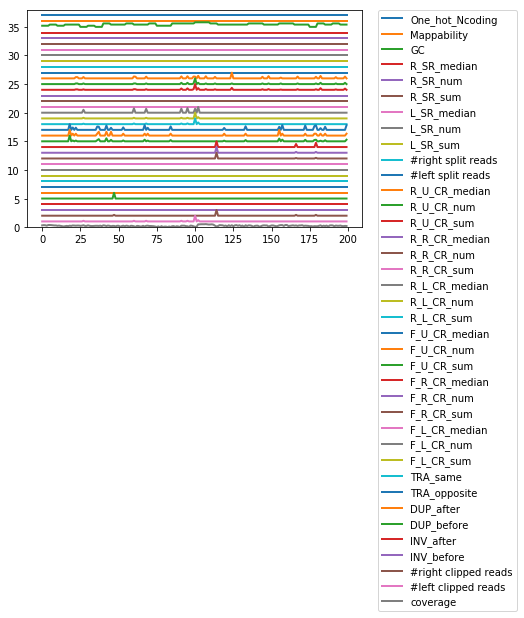

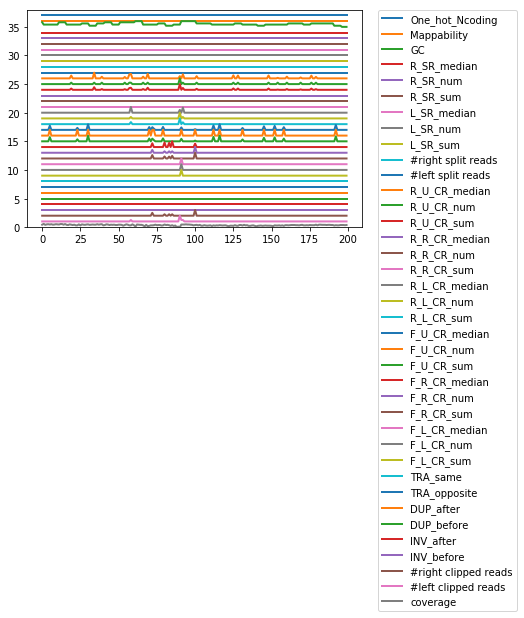

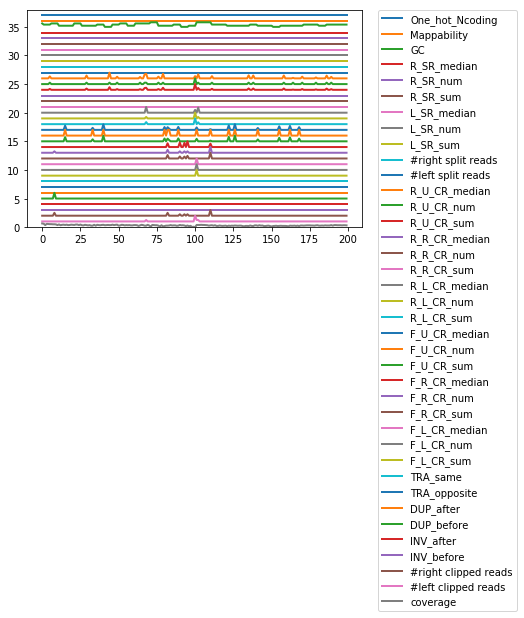

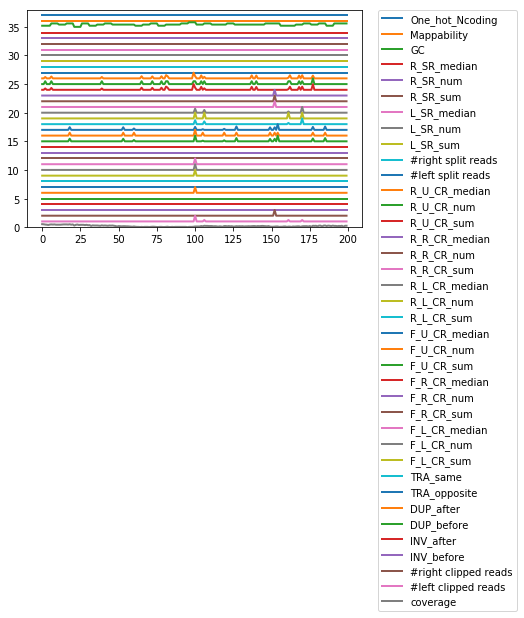

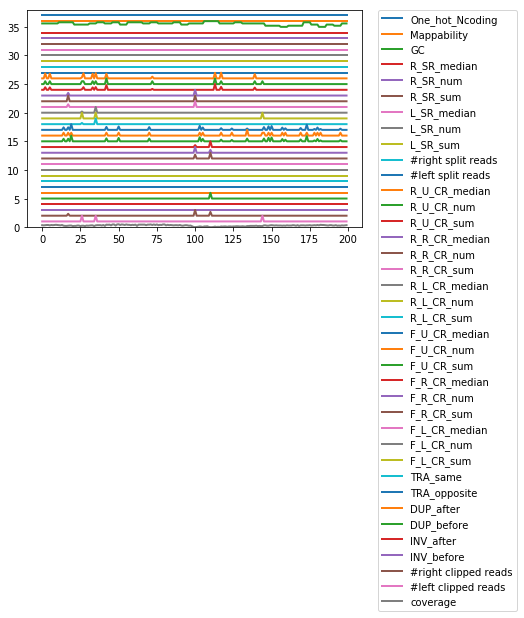

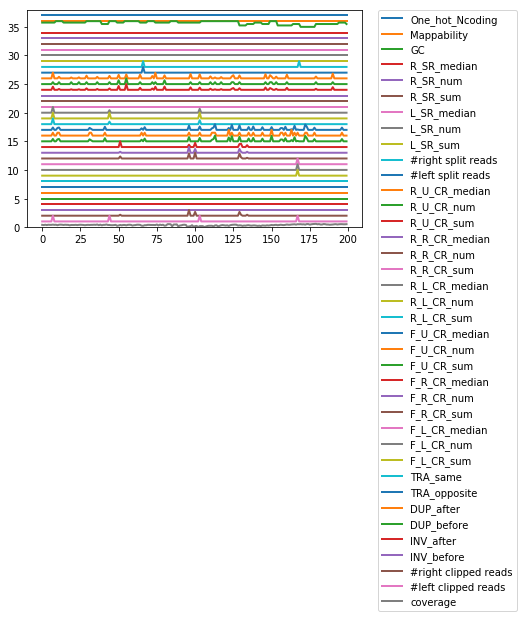

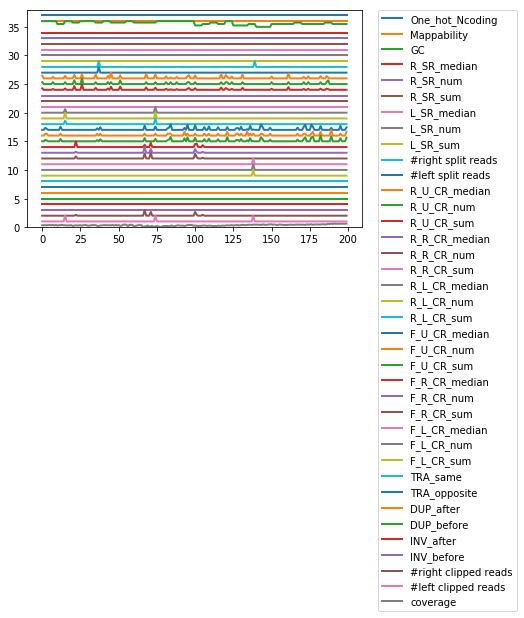

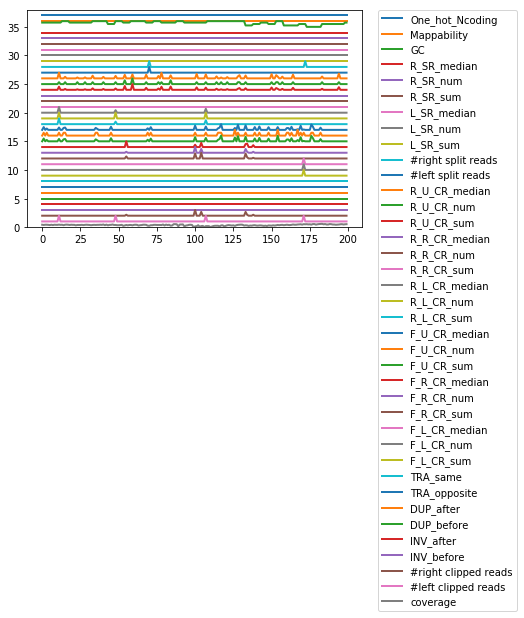

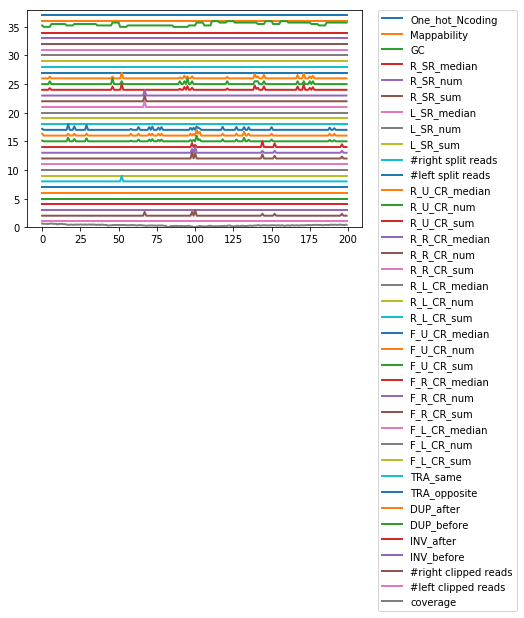

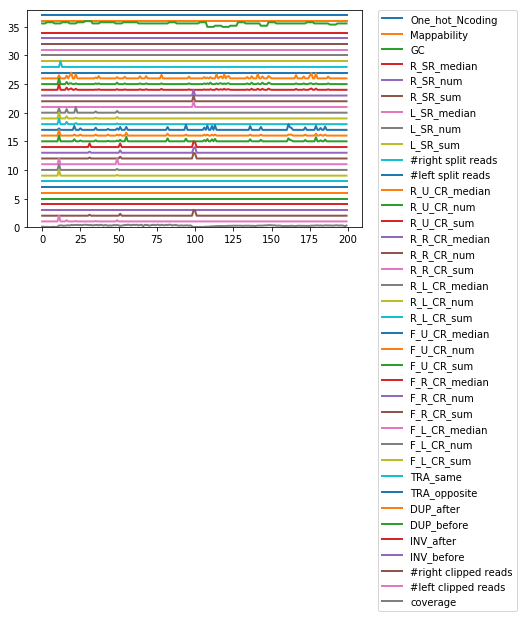

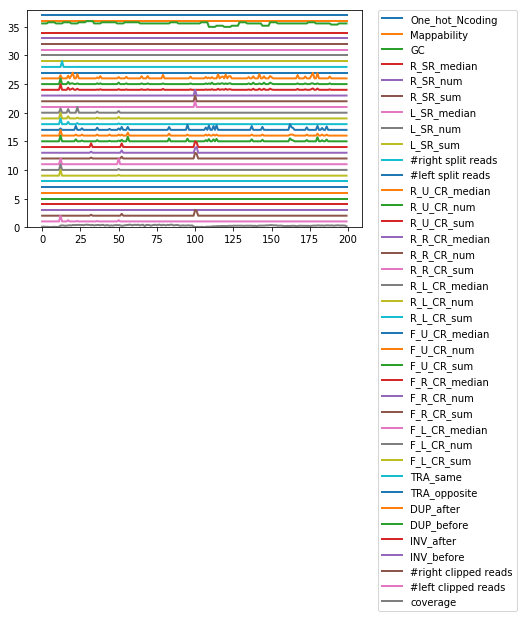

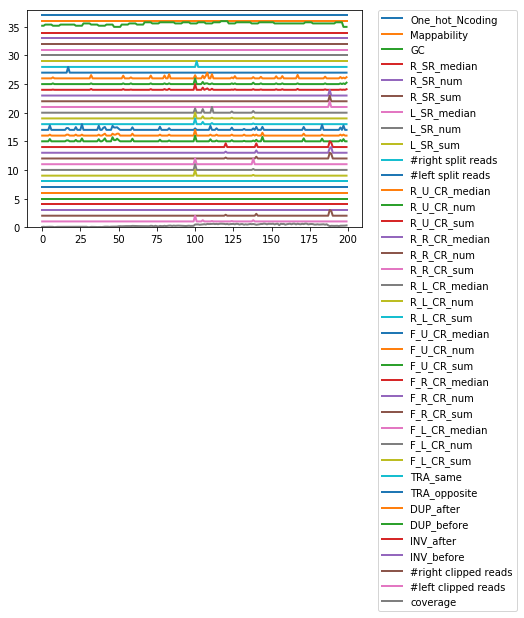

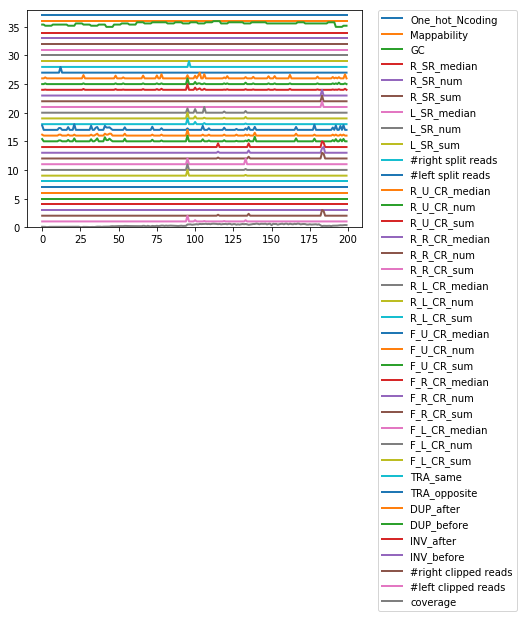

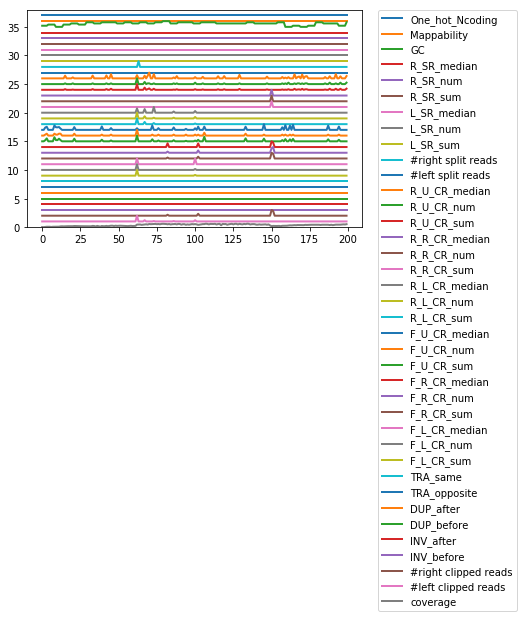

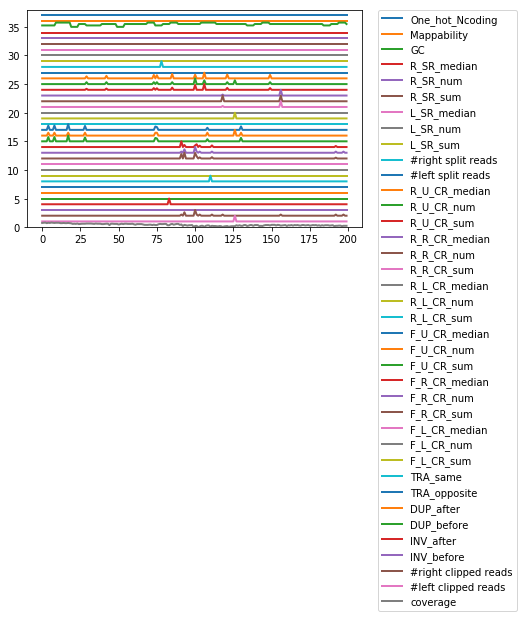

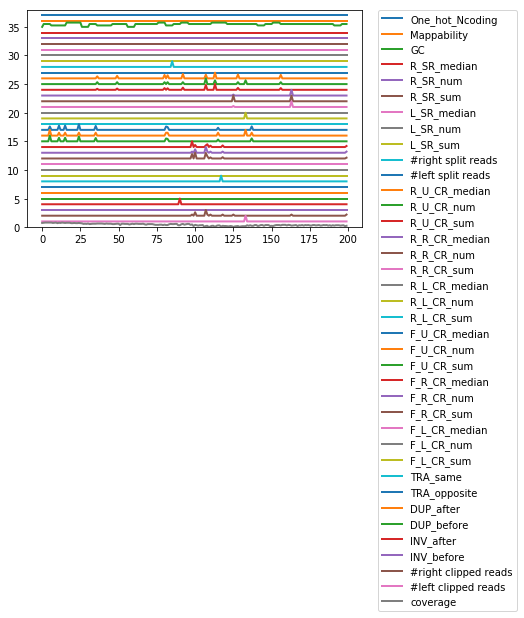

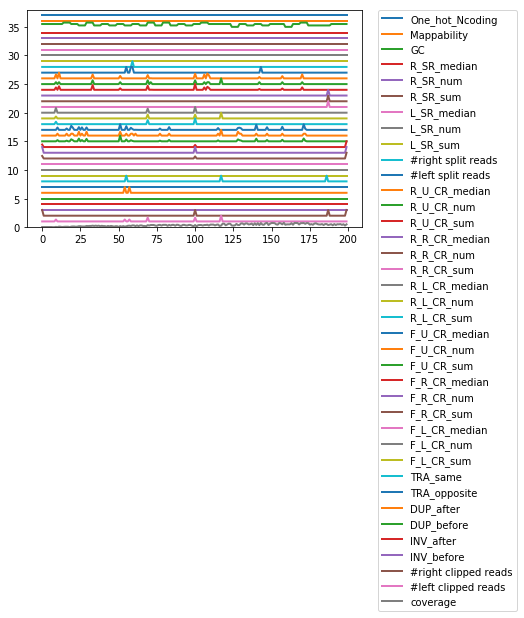

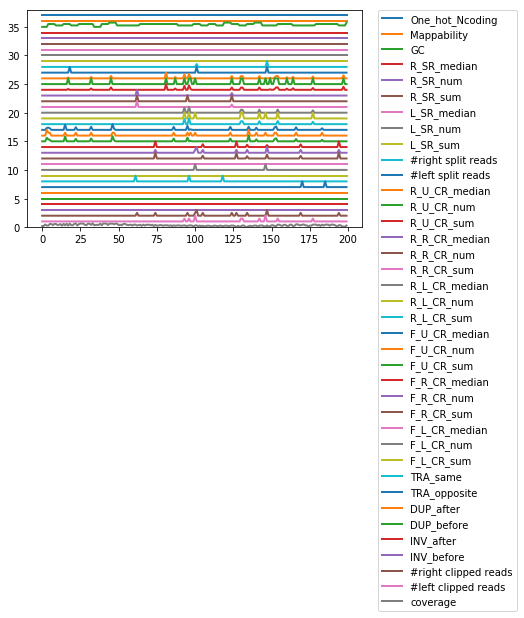

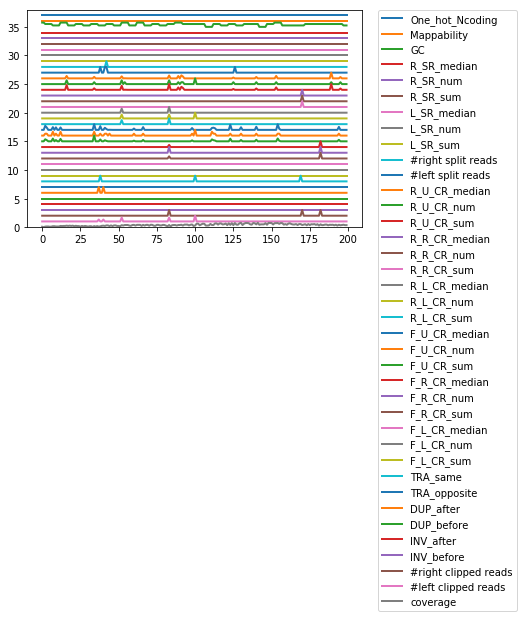

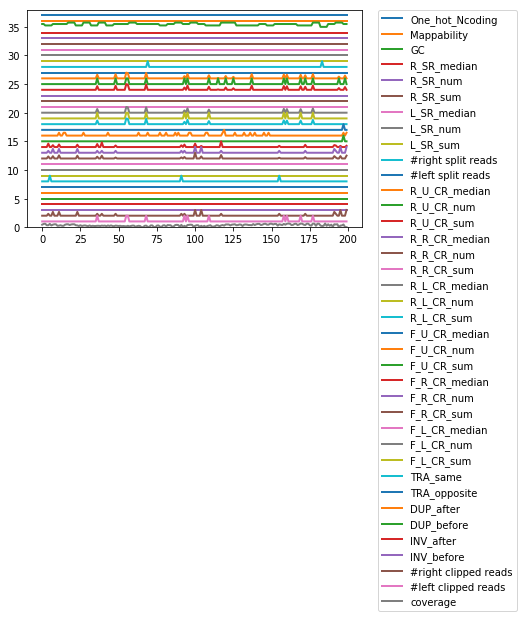

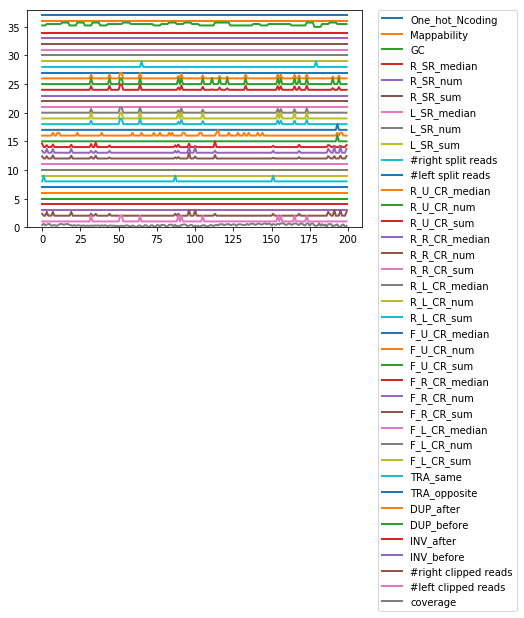

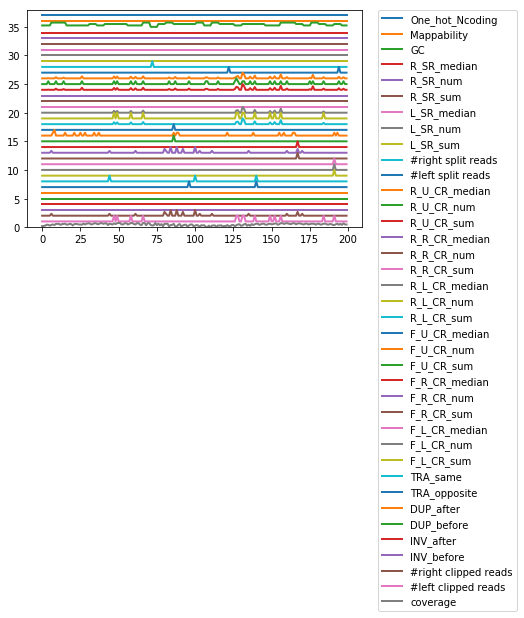

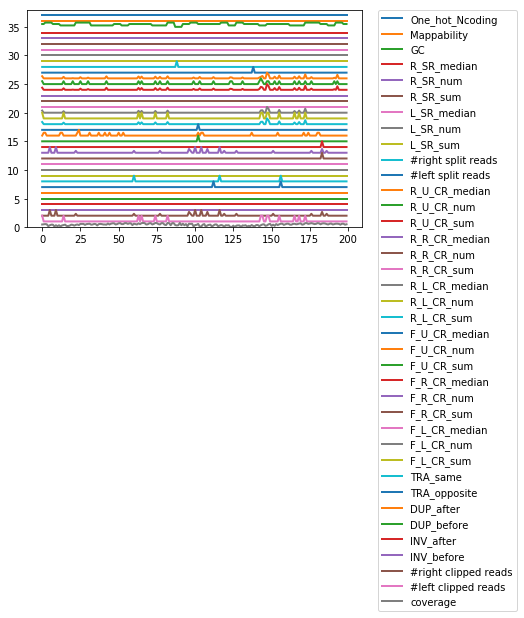

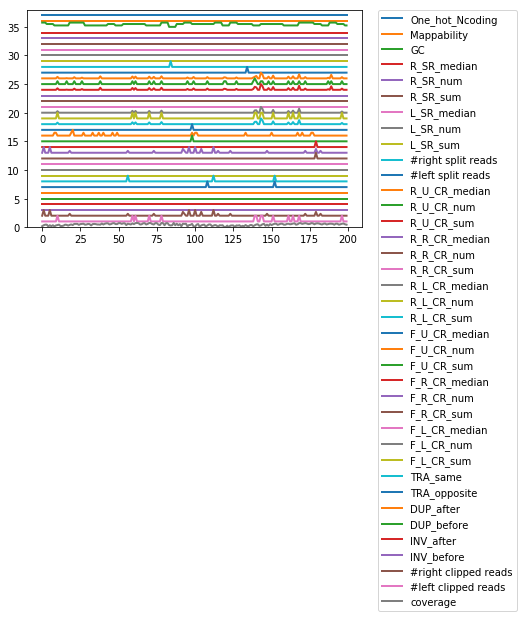

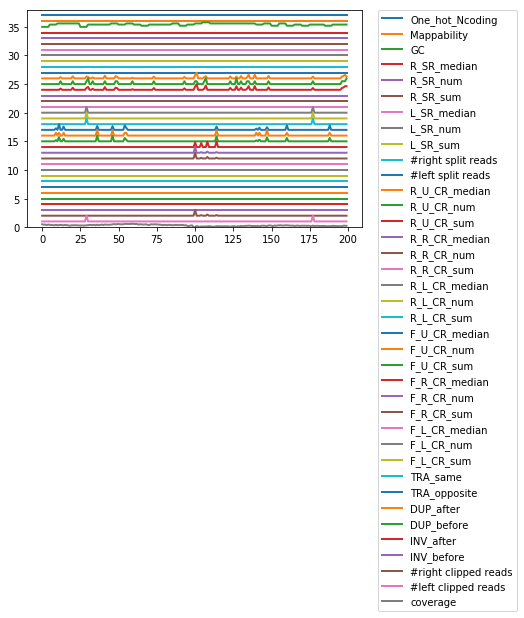

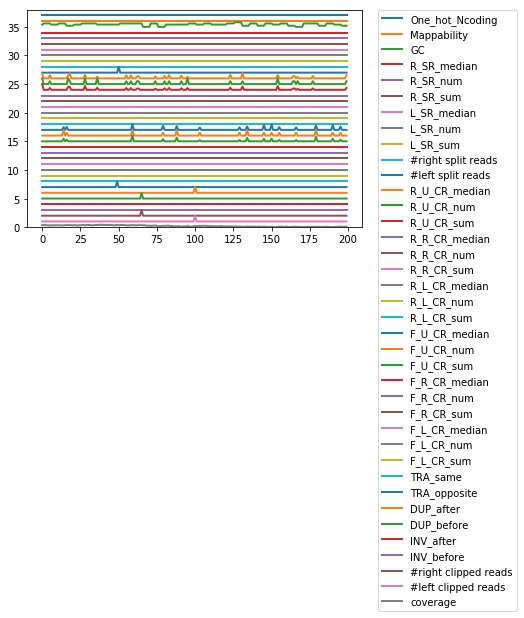

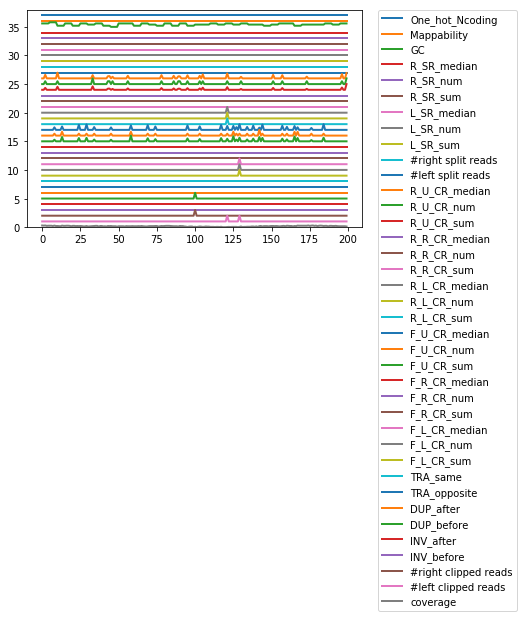

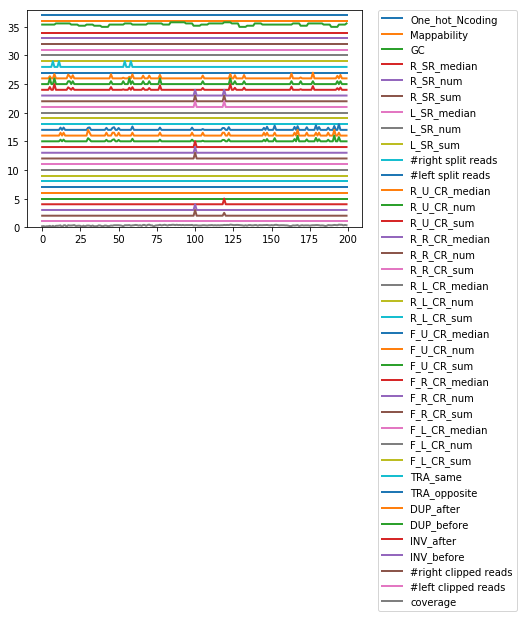

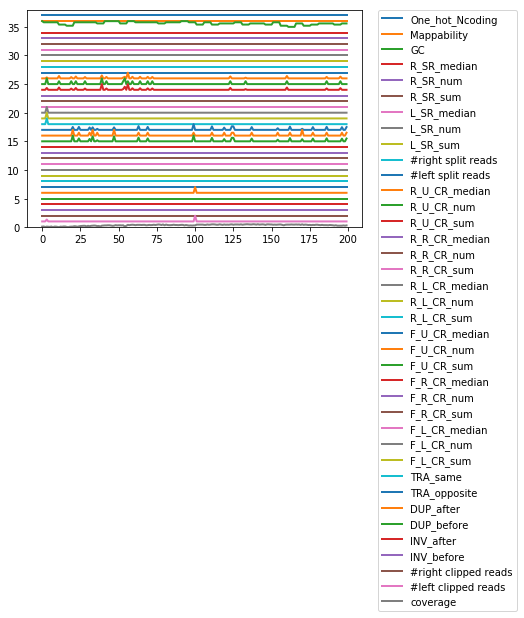

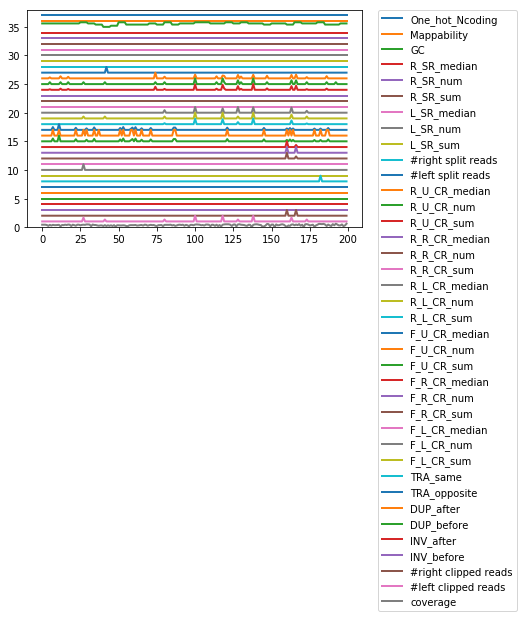

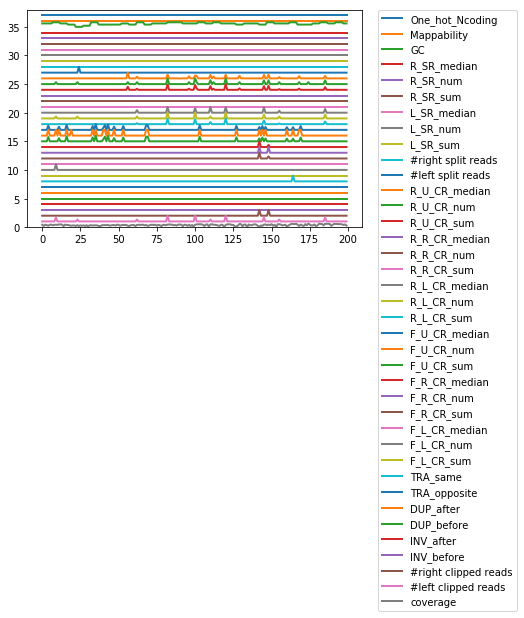

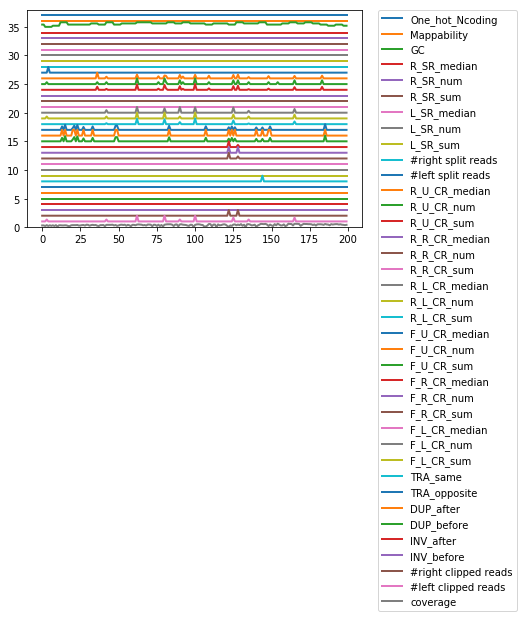

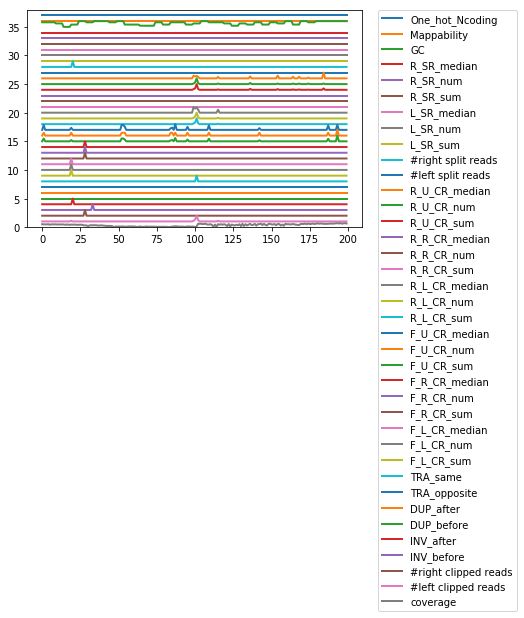

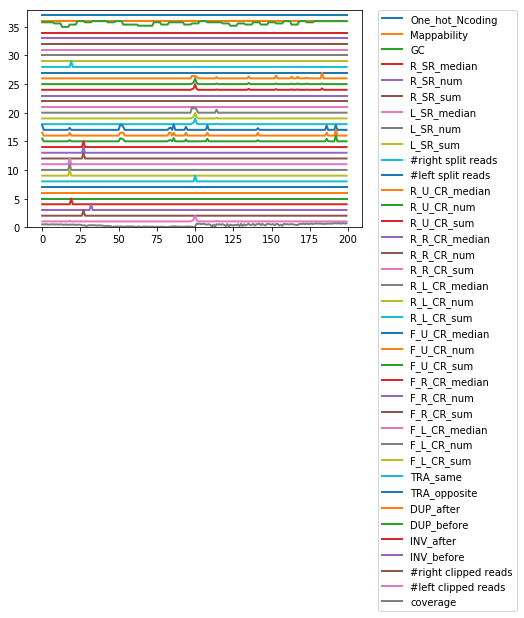

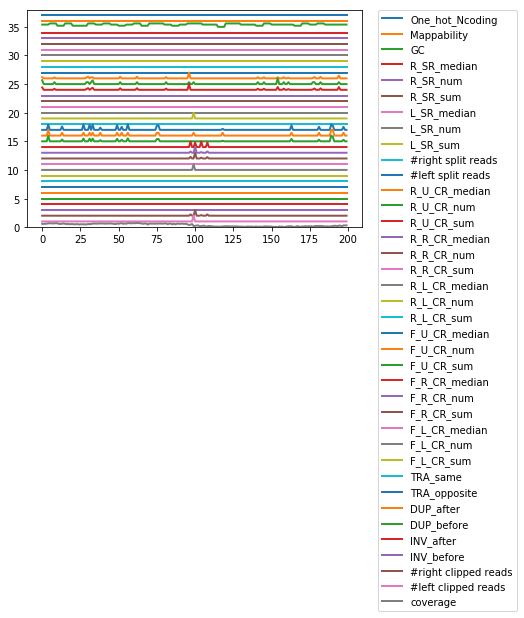

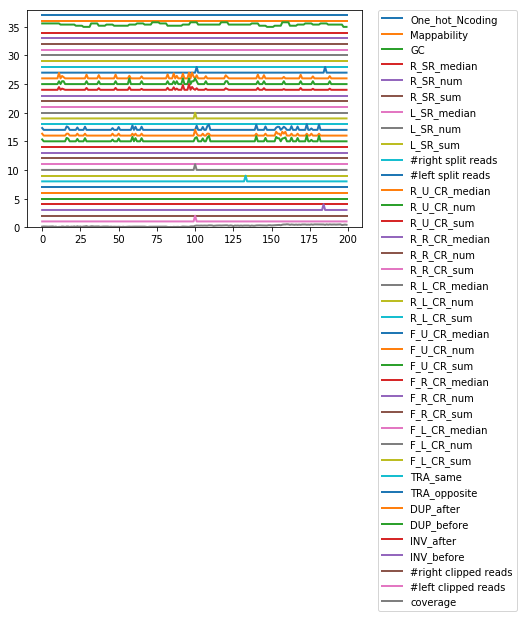

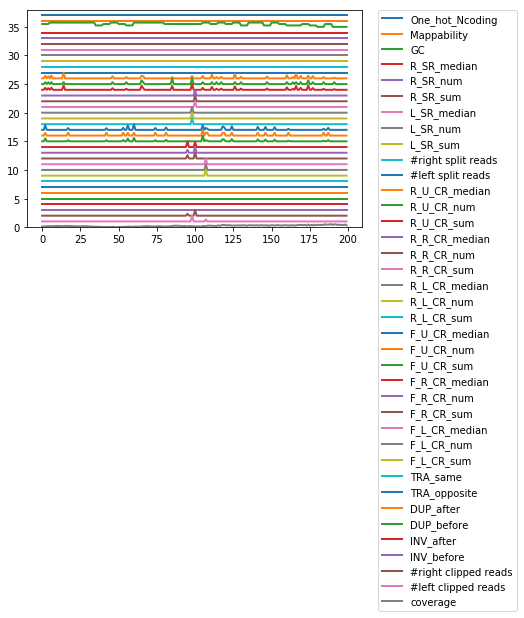

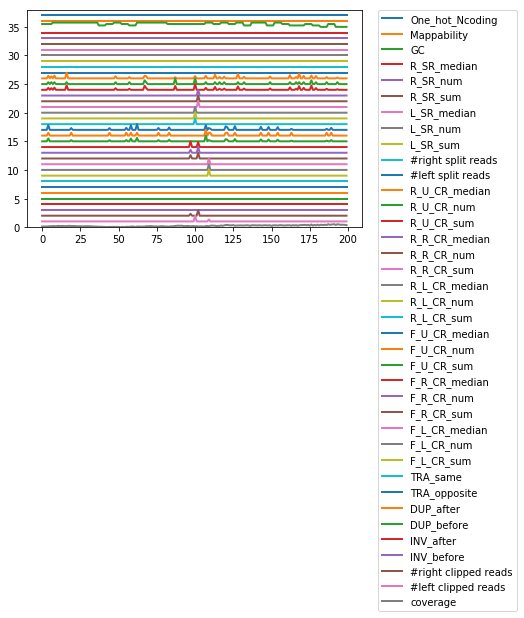

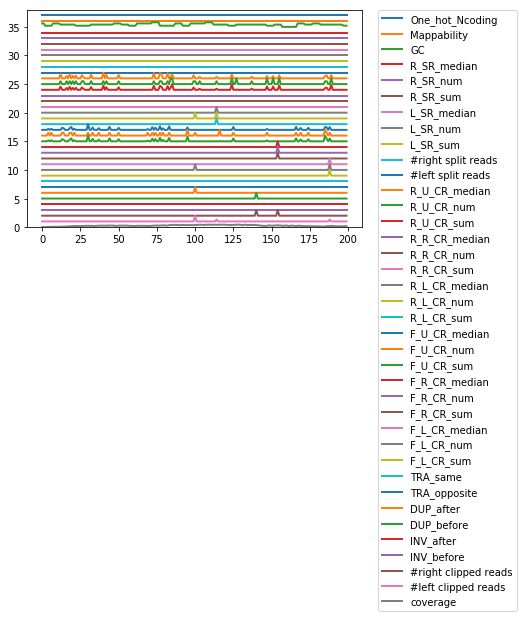

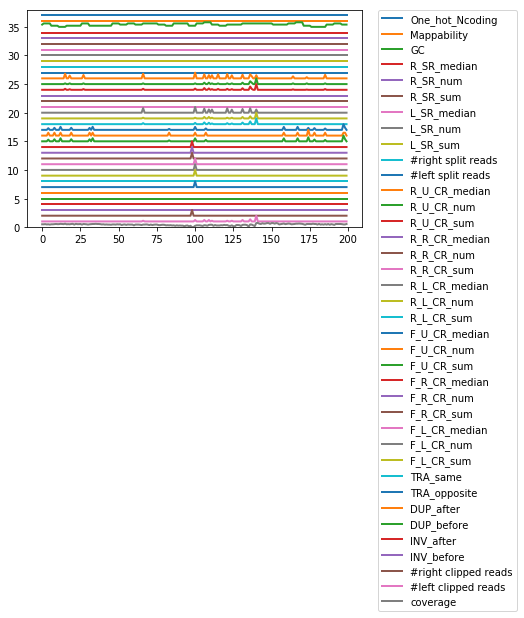

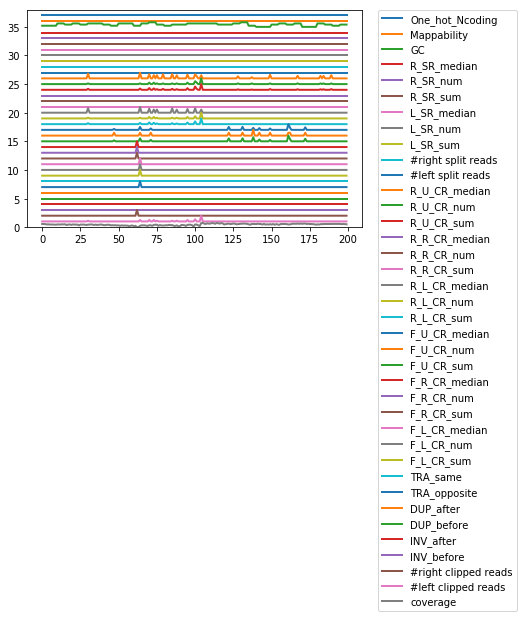

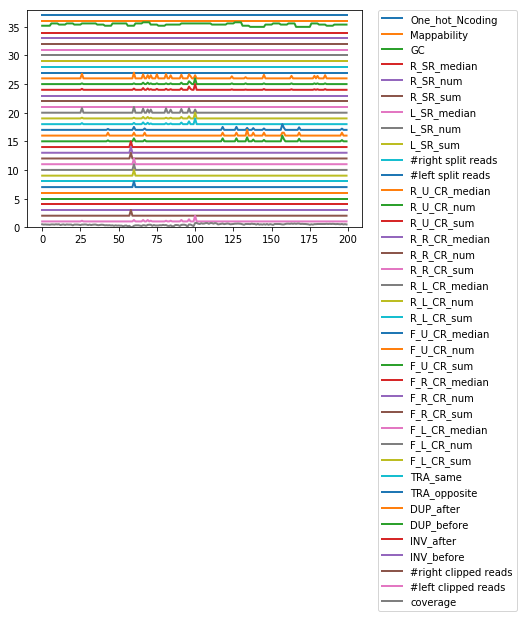

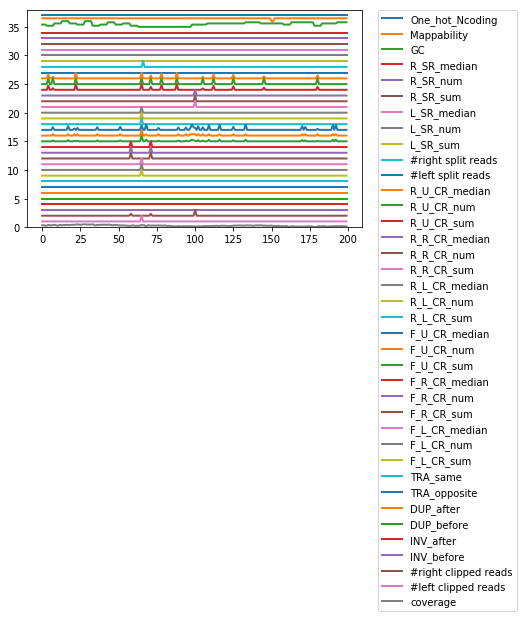

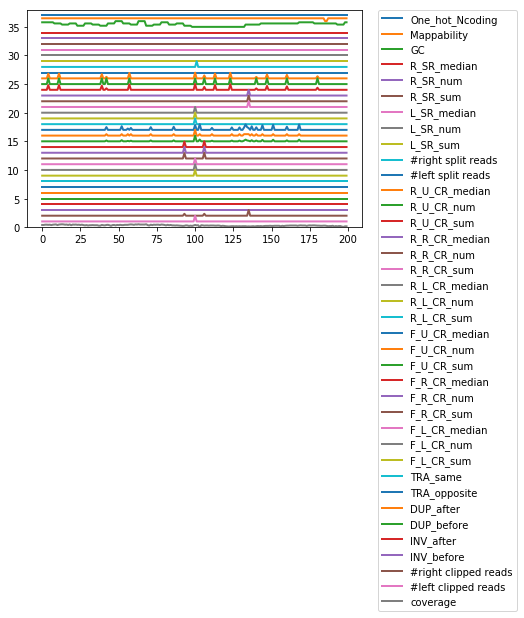

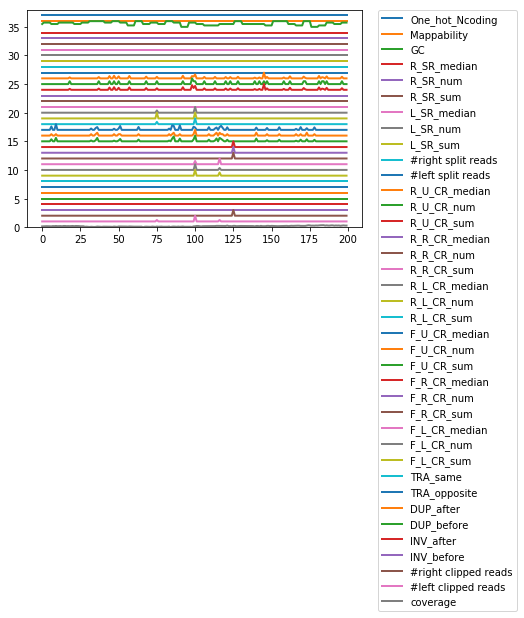

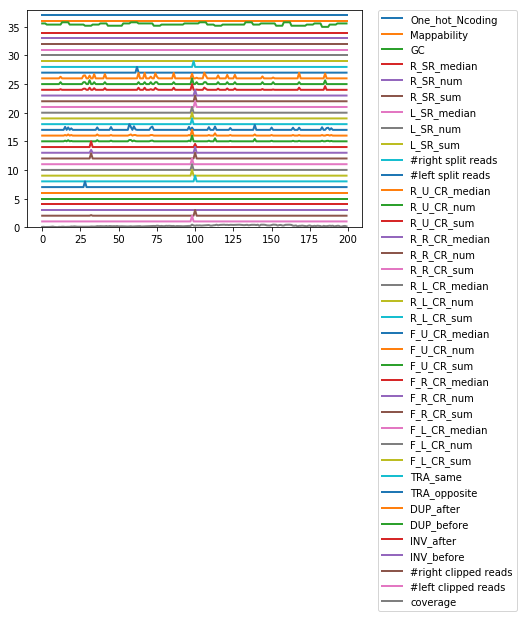

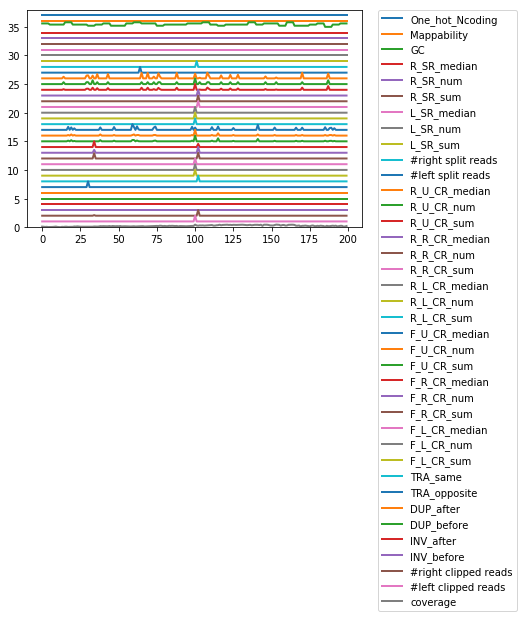

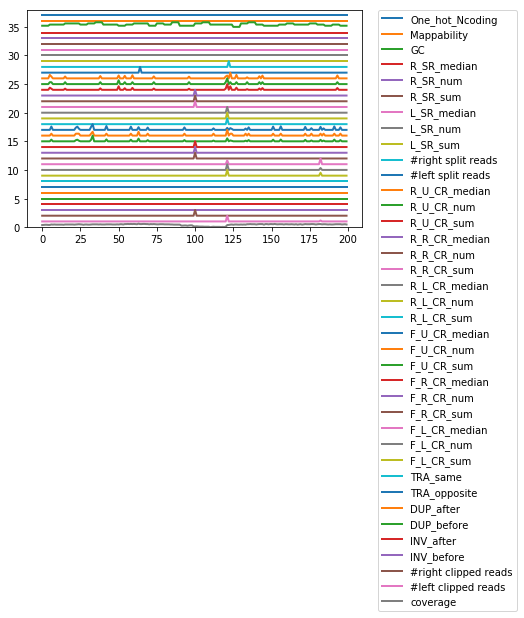

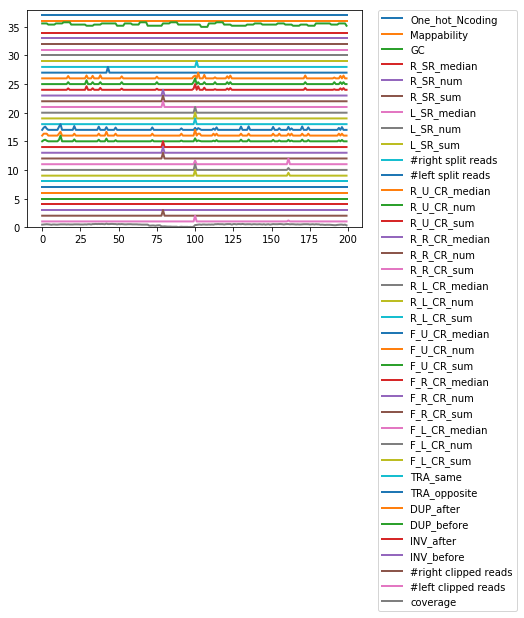

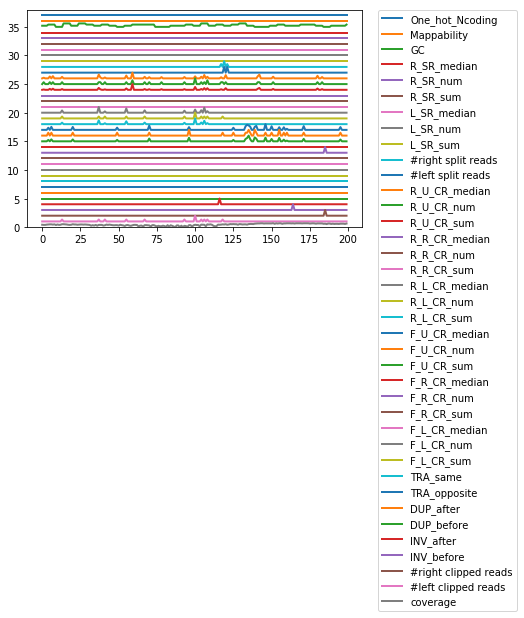

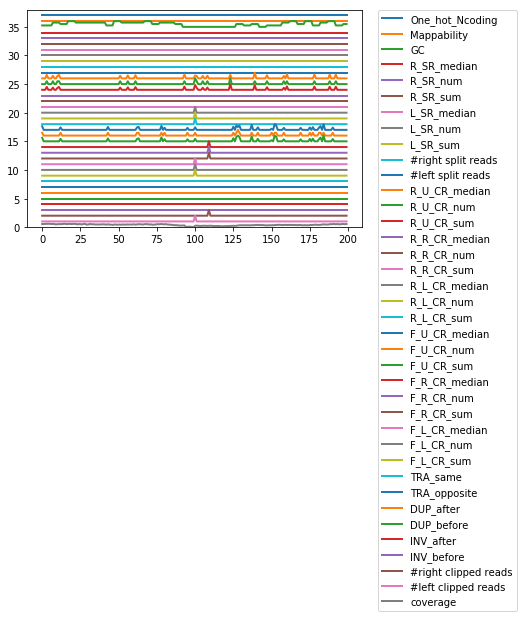

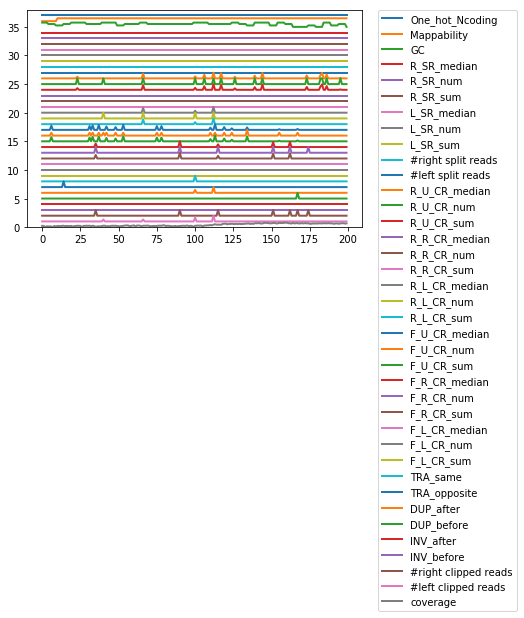

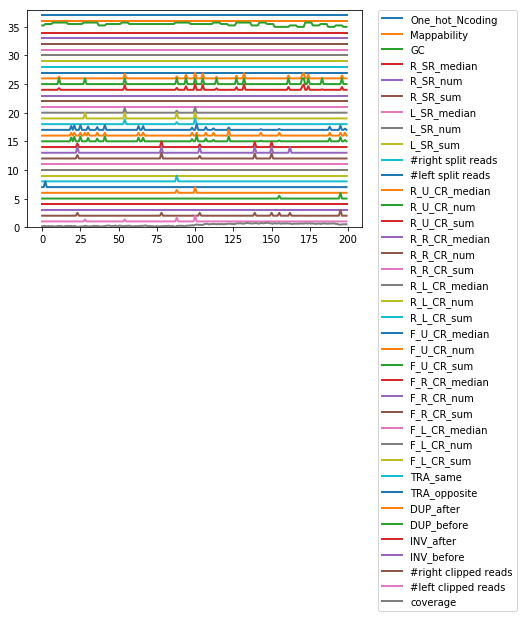

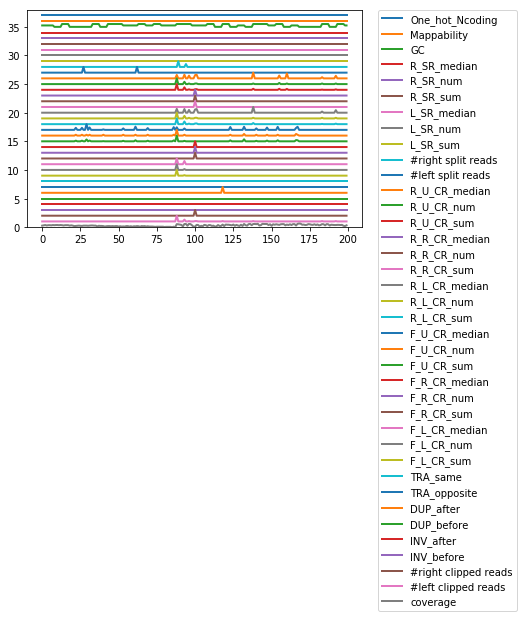

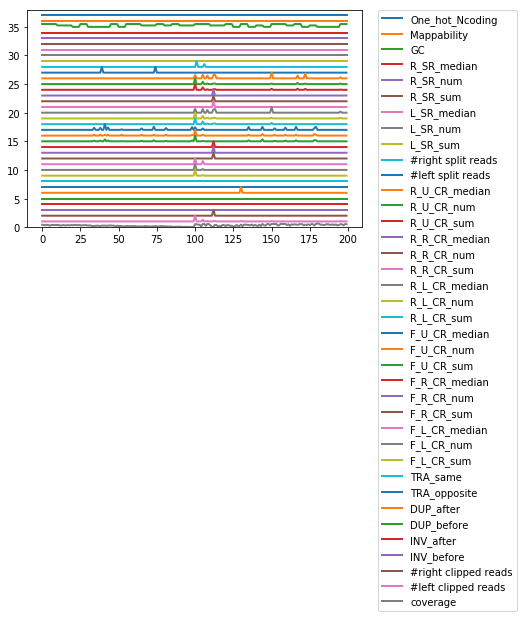

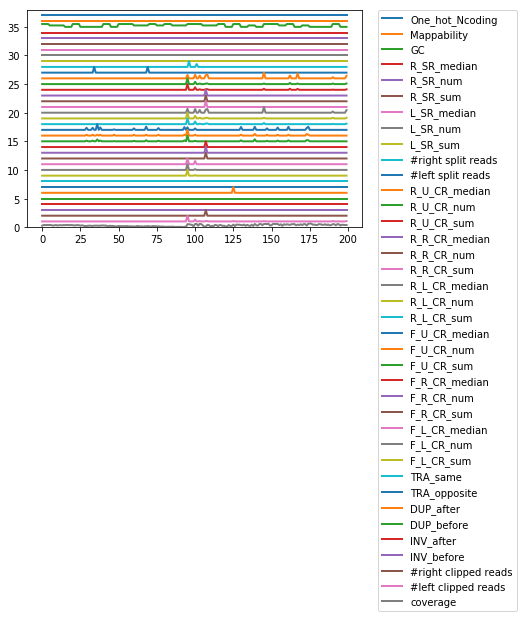

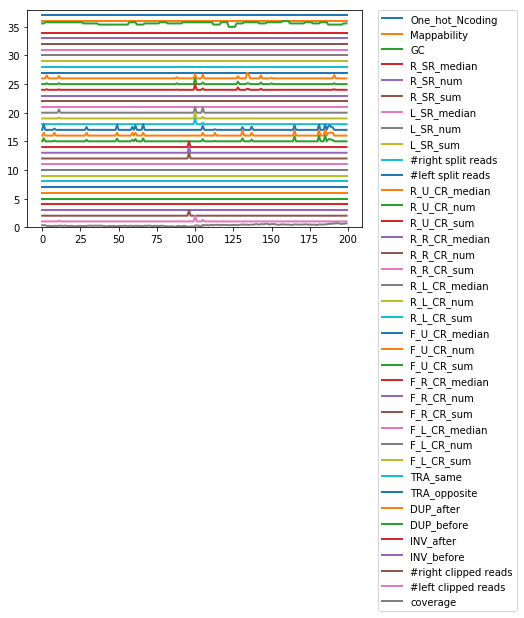

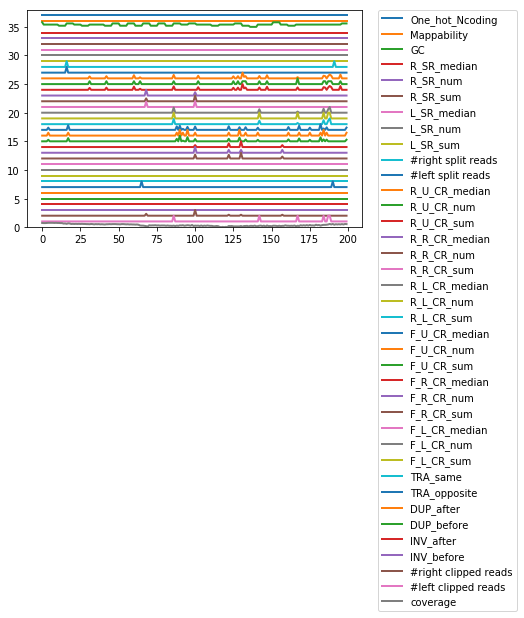

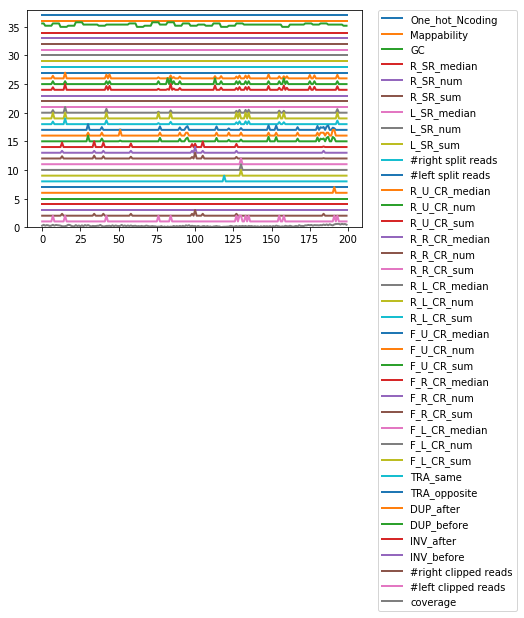

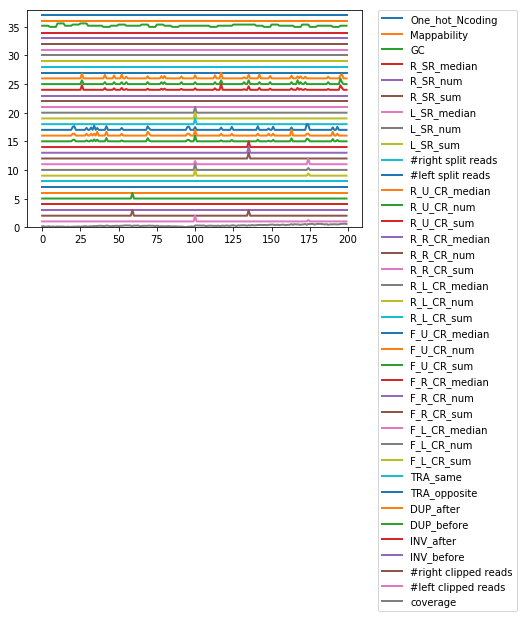

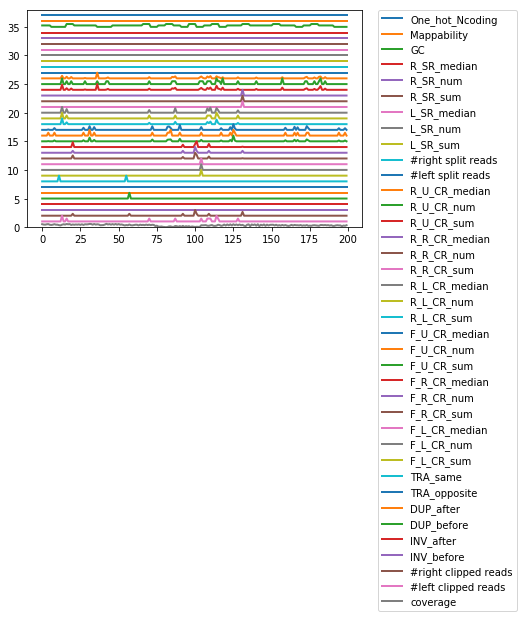

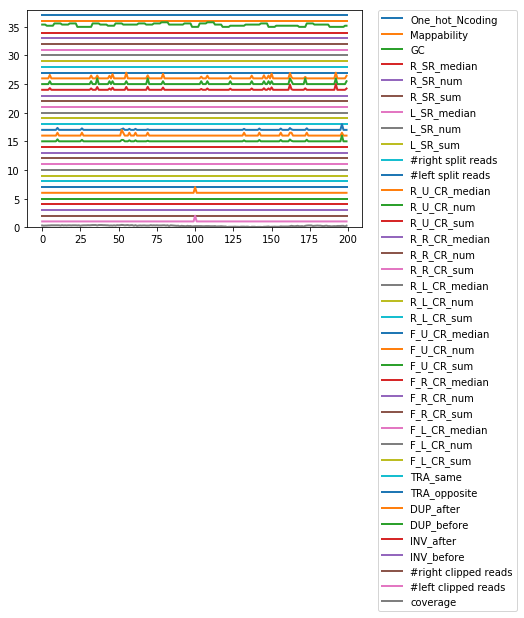

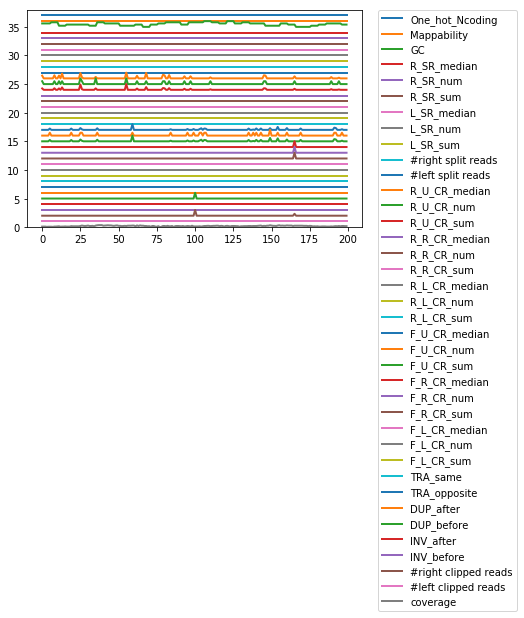

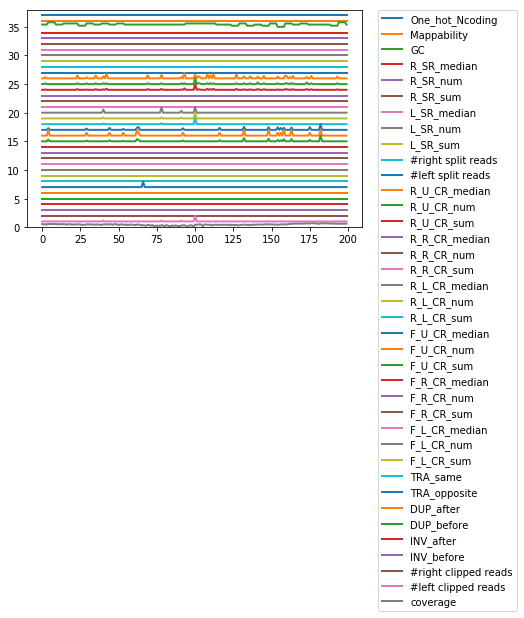

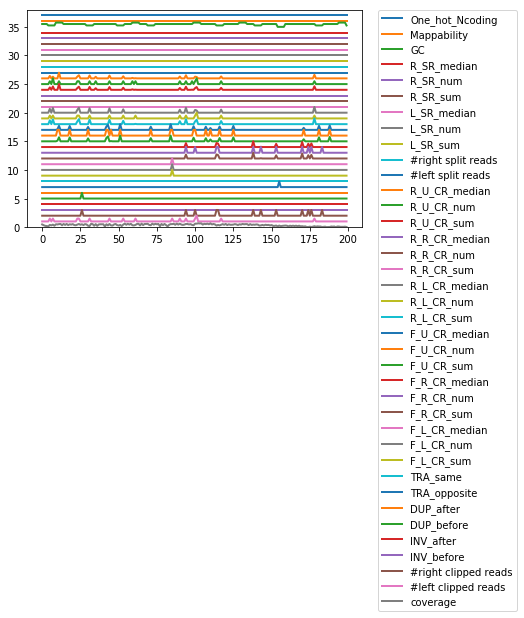

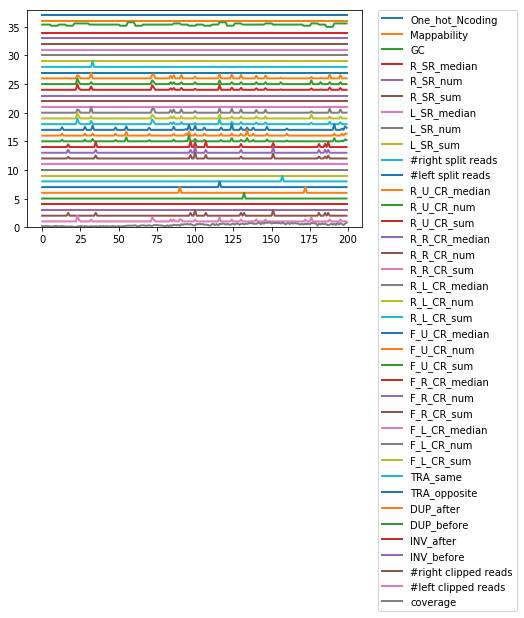

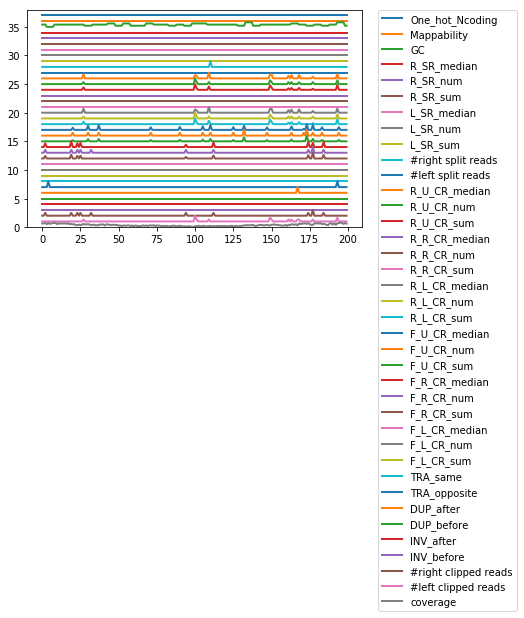

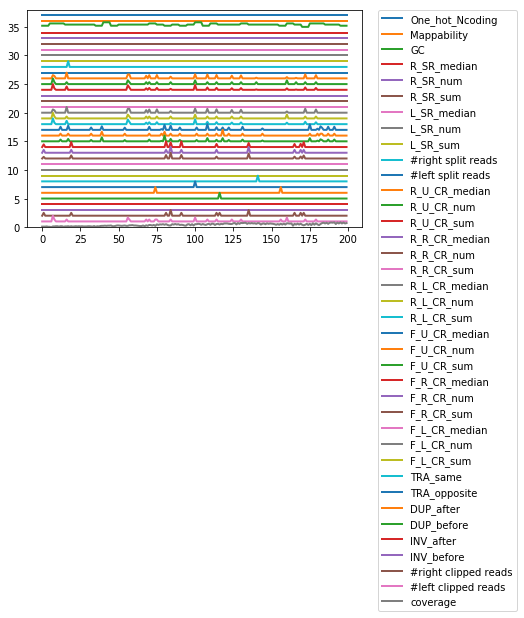

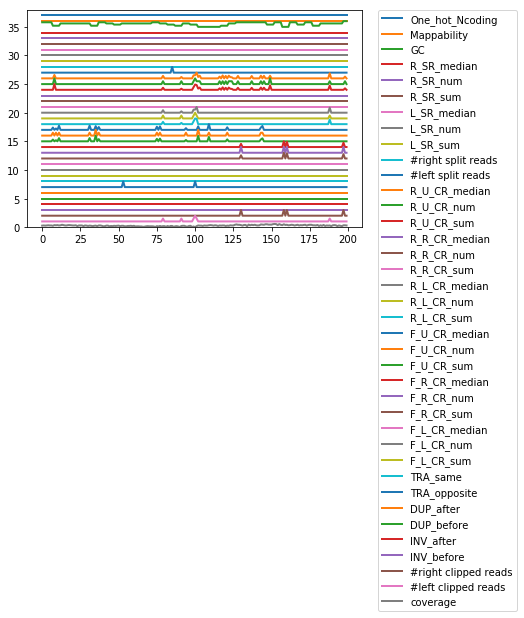

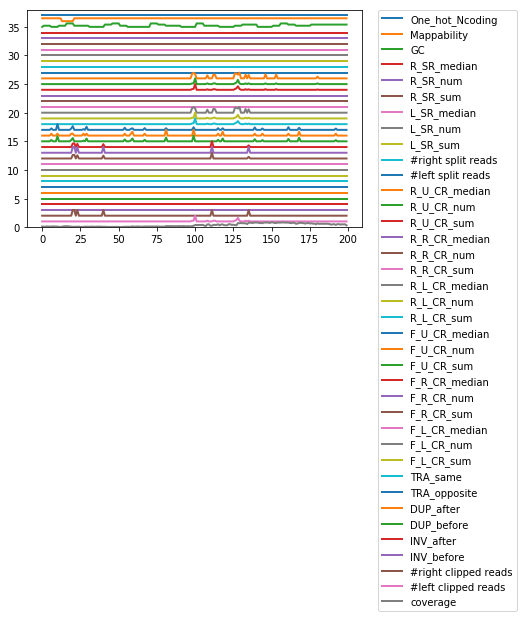

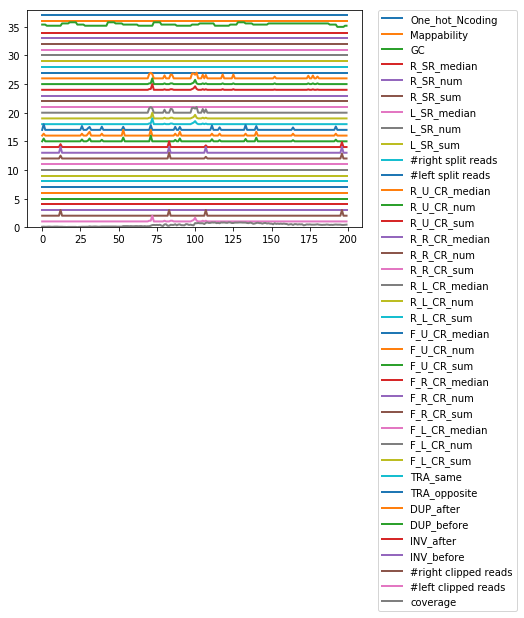

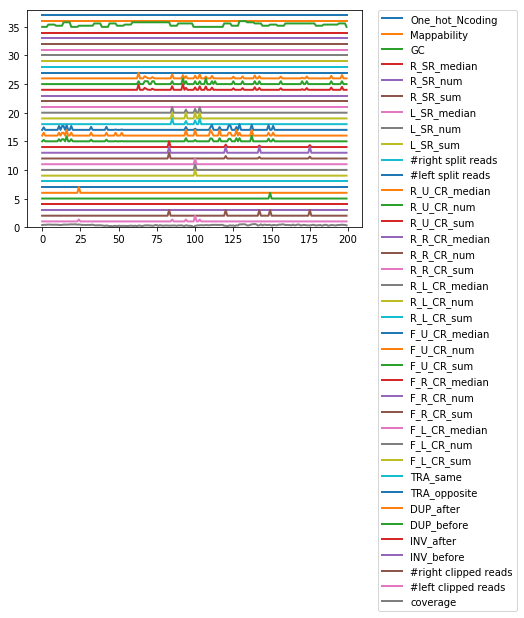

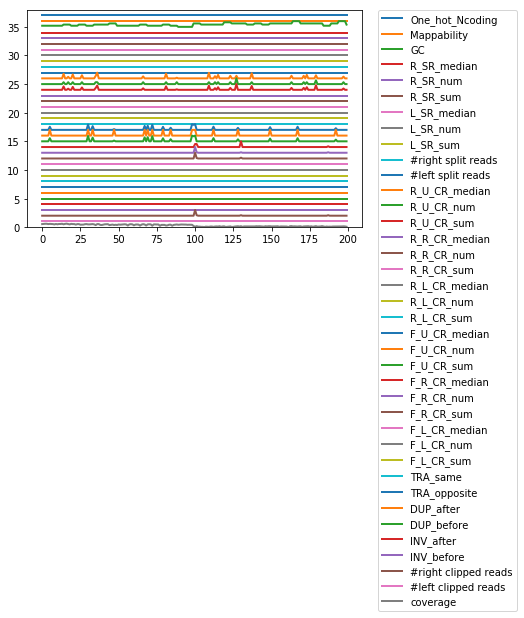

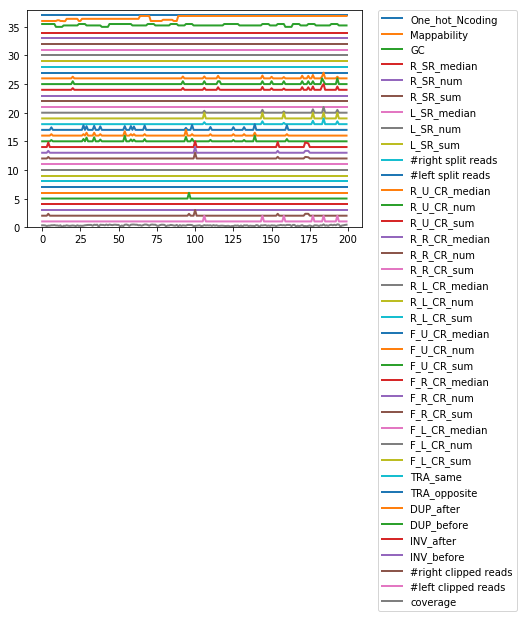

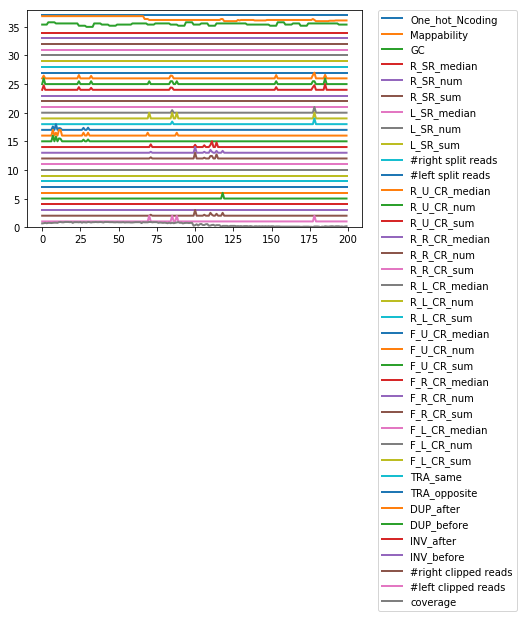

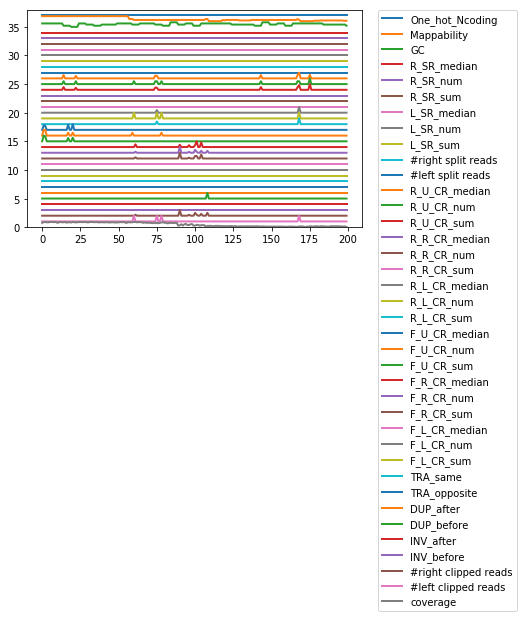

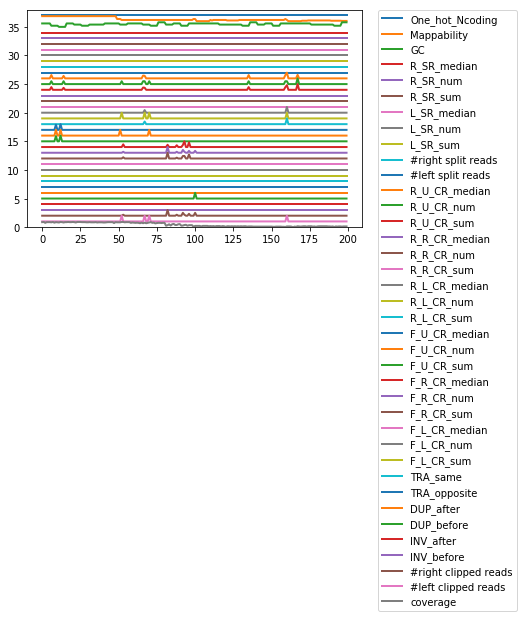

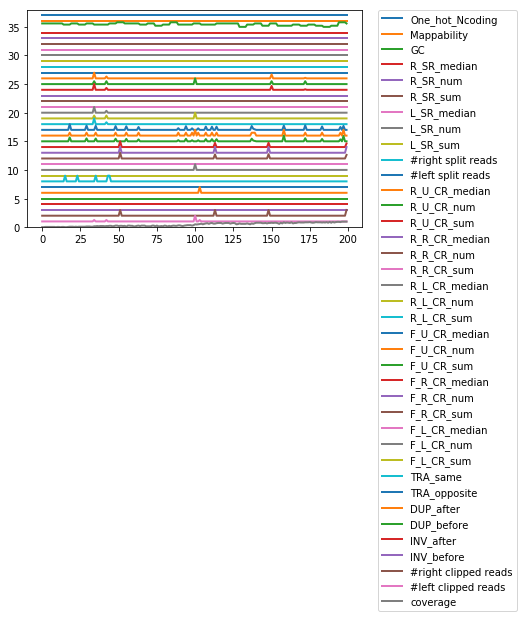

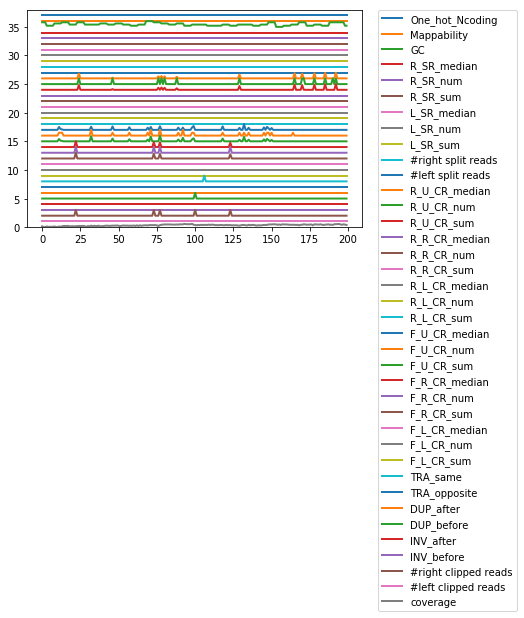

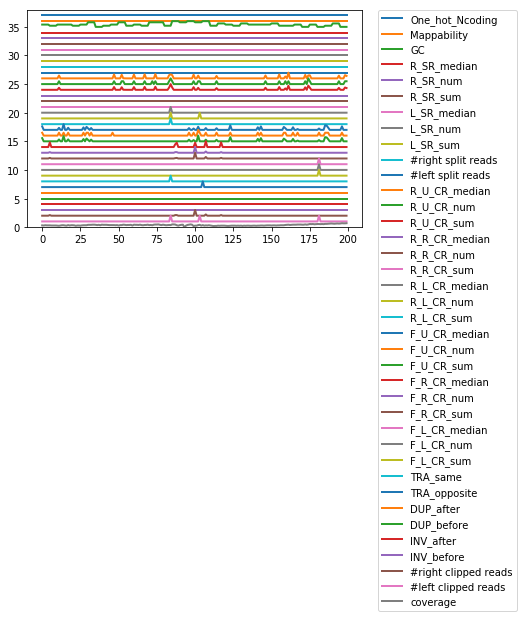

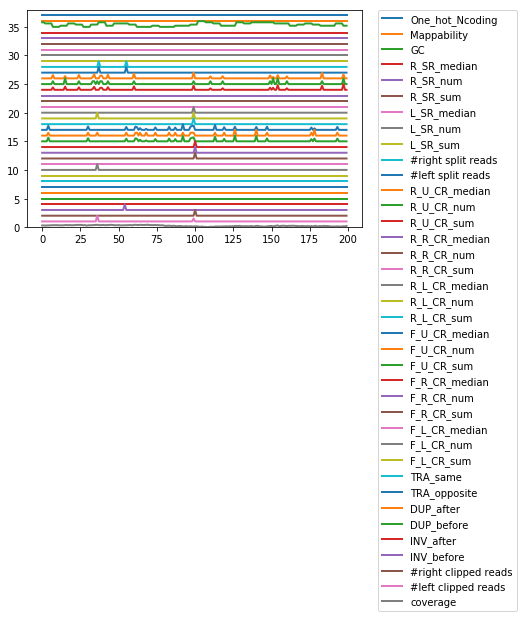

In [30]:
svtype = 'DEL'
#idx = np.where(labels=="noSV")
#idx = np.where(labels=="noSV")
idx = np.where(labels==svtype+"_start")
#idx = np.where(labels==svtype+"_end")

print(idx[0][0])

# start_window = 3990
plot_channels(idx[0][0], 100)

In [ ]:
#print(labels)

In [ ]:
#Relabel deletions
del_idx = np.where(np.logical_or(np.array(labels)=='DEL_start',np.array(labels)=='DEL_end'))
print(del_idx)
print(len(del_idx))
print(len(labels))
labels[del_idx] = 'DEL'

In [283]:
cnt_lab = Counter(labels)
#print([v for k, v in cnt_lab.items()])
min_v = min([v for k, v in cnt_lab.items()])

print(cnt_lab)
print('Minimum number of labels = ' + str(min_v))
#np.concatenate(data[np.where(labels == 'noSV')][]

Counter({'noSV': 1139786, 'DEL_start': 1406, 'DEL_end': 1358})
Minimum number of labels = 1358


In [284]:
data_balanced = []
labels_balanced = []

for l in cnt_lab.keys():
    #print(l)
    iw = np.where(labels==l)
    #print(iw[0])
    ii = np.random.choice(a=iw[0], size=min_v, replace=False)
    data_balanced.extend(data[ii])
    labels_balanced.extend(labels[ii])

print(Counter(labels_balanced))

Counter({'noSV': 1358, 'DEL_start': 1358, 'DEL_end': 1358})


In [285]:
X = np.array(data_balanced)
y = np.array(labels_balanced)

In [253]:
# Selecting only a few channels
#indices = np.array([0,1,2,9,12,15,18,19,20,23,26])
#X = X[:,indices,:]

#include_ii = np.where(y!='noSV')
#X = X[include_ii]
#y = y[include_ii]

In [286]:
X.shape

(4074, 6, 200)

In [287]:
y.shape

(4074,)

### Number of channels

In [288]:
number_channels = X.shape[1]
number_channels

6

In [289]:
#Split into training, validation and test set 60/20/20
cnt_lab = Counter(labels_balanced)
n_lab = [v for v in cnt_lab.values()][0]
i_train = int(n_lab*0.6)
i_val = i_train + int(n_lab*0.2)
print(i_train)
print(i_val)

X_train = []
y_train = []
X_val = []
y_val = []
X_test = []
y_test = []

for l in cnt_lab.keys():
    iw = np.where(y==l)
    #print(iw[0])
    #print(iw[0][:i_train])
    X_train.extend(X[iw[0][:i_train]])
    X_val.extend(X[iw[0][i_train:i_val]])
    X_test.extend(X[iw[0][i_val:]])
    
    y_train.extend(y[iw[0][:i_train]])
    y_val.extend(y[iw[0][i_train:i_val]])
    y_test.extend(y[iw[0][i_val:]])

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

y_train = np.array(y_train)
y_val = np.array(y_val)
y_test = np.array(y_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)


814
1085
(2442, 6, 200)
(813, 6, 200)
(819, 6, 200)
(2442,)
(813,)
(819,)


## Normalize data

In [ ]:
#coverage = np.median(X_train[:, 0, :]) #the median of the coverage in the normal cells
#coverage

#NA12878 median insert size: 368
#expected coverage:
hg19_len = 3095693981
read_len = 150
coverage = int(976976324 * read_len / hg19_len)
print(coverage)

In [ ]:
#not used now

expected_distance = 368

def normalize(X):       
    for i in range (0, len(X)):            
        for k in [3,5]:
            X[i][k] = np.divide(X[i][k],  X[i][1]/2 + 1/(10*X[i][1]+1)) #divide by number of clips
        for k in [4,6]:            
            X[i][k] = np.divide(X[i][k],  X[i][2]/2 +  1/(10*X[i][2]+1))
        for k in [3+11,5+11]:
            X[i][k] = np.divide(X[i][k],  X[i][1+11]/2 +  1/(10*X[i][12]+1))
        for k in [4+11,6+11]:            
            X[i][k] = np.divide(X[i][k],  X[i][2+11]/2+  1/(10*X[i][13]+1))
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100
            
#normalize(X_train)
#normalize(X_val)
#normalize(X_test)

In [ ]:
#not used now

expected_distance = 150
def normalize(X):       
    for i in range (0, len(X)):                    
        for k in [3,4,5,6,14,15,16,17]:#the distance channels
            X[i][k] = np.divide(X[i][k], expected_distance)
        for j in range(0,number_channels):                                                                             
            X[i][j] = np.divide(X[i][j], coverage)*100     
normalize(X_train)
#normalize(X_val)
#normalize(X_test)

## Plots several  windows 

In [ ]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[],
                   ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))
ax3 = fig.add_axes([0.1, -0.3, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))
ax3.plot(np.sin(x));

In [ ]:
fig = plt.figure()
i = 1
shift = 0.4

print(y_train[i], 'id:', i)
#print('id:', i)
for j in range (0, number_channels): 

    ax = fig.add_axes([0.1, 0.1+j*shift, 0.8, 0.4],
                       ylim=(-1.2, 1.2))
    Z = [ (x - min(X_train[i][j]))/max(X_train[i][j]) for x in X_train[i][j]]

    ax.plot(Z)
        
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 5})    
#plt.show()

In [ ]:
n_windows = X_train.shape[0]
label = ["None"] * number_channels

In [ ]:
label[0] = "cov"
label[1] = "L_CR"
label[2] = "R_CR"

label[3] = "INV_B"
label[4] = "INV_A"
label[5] = "R_CR_DUP_B"
label[6] = "L_CR_DUP_A"

label[7] = "F_L_CR_sum"
label[8] = "F_L_CR_num"
label[9] = "F_L_CR_med"
label[10] = "F_R_CR_sum"
label[11] = "F_R_CR_num"
label[12] = "F_R_CR_med"

label[13] = "R_L_CR_dist_sum"
label[14] = "R_L_CR_dist_num"
label[15] = "R_L_CR_dist_med"
label[16] = "R_R_CR_dist_sum"
label[17] = "R_R_CR_dist_num"
label[18] = "R_R_CR_dist_med"

label[19] = "L_SR"
label[20] = "R_SR"

label[21] = "L_SR_dist_sum"
label[22] = "L_SR_dist_num"
label[23] = "L_SR_dist_med"

label[24] = "R_SR_dist_sum"
label[25] = "R_SR_dist_num"
label[26] = "R_SR_dist_med"

In [ ]:
from numpy import *
import math
import matplotlib.pyplot as plt

colors =['b','g', 'm', 'gray', 'r','c', 'darkgreen' ,'y', 'k', 'orange', 'gray']

def plot_channels(start_window, n_windows):
    for i in range (start_window, start_window + n_windows, 5):
        print(y_train[i], 'id:', i)
        #print('id:', i)
        for j in range (0, number_channels):   
            if j in [3, 6, 14, 17]:
                continue
            shift = 0
            start =0
            if j in [0,11]:
                shift = -100
            if j > 10:
                start = -60
            Z = [start + shift + 300 + x - 5*j*4 for x in X_train[i][j]]  
            #plt.ylim([100,700])
            if np.max(Z) > 1000:
                plt.ylim([-200,1000])
                Z = [start + shift + 300 + x - 5*j*4 - 400 for x in X_train[i][j]]  
            if j>10:
                plt.plot(Z,  label = label[j], linestyle=':', linewidth=1.5, color = colors[j % 11])
            else:
                plt.plot(Z, label = label[j], color = colors[j])
        
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'size': 5})    
        plt.show()

In [ ]:
start_window = 0
print(n_windows)
#plot_channels(start_window, n_windows)

#print(Counter(y_train))

plot_channels(start_window, 300)

   
## Transposes every window in X, to comply to McFly format

In [290]:
def transposeDataset(X):
    image = []
    for i in range (0, len(X-1)):
        tr = X[i].transpose()
        image.append(tr)
    return np.array(image)

image1 = transposeDataset(X_train)
image2 = transposeDataset(X_val)
image3 = transposeDataset(X_test)
X_train = image1
X_val = image2
X_test = image3

n_channels = len(X_train[0][0])
print(len(X_test[0][0]))

6


## Prepare the labels in McFly format

In [291]:
classlabels = list(set(y_train))
mapclasses = {classlabels[i] : i for i in range(len(classlabels))}
print(mapclasses)

y_train = np.array([mapclasses[c] for c in y_train], dtype='int')
y_val = np.array([mapclasses[c] for c in y_val], dtype='int')
y_test = np.array([mapclasses[c] for c in y_test], dtype='int')

y_train_binary = to_categorical(y_train)
y_val_binary = to_categorical(y_val)
y_test_binary = to_categorical(y_test)

{'DEL_end': 0, 'noSV': 1, 'DEL_start': 2}


In [292]:
y_test_binary

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

## Generate neural networks architectures

In [227]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Convolution1D, Flatten, MaxPooling1D
from keras.optimizers import Adam
import sys
import os
import numpy as np
sys.path.insert(0, os.path.abspath('..'))
from mcfly import modelgen, find_architecture

In [228]:
#From https://stackoverflow.com/questions/43076609/how-to-calculate-precision-and-recall-in-keras
import tensorflow as tf

def as_keras_metric(method):
    import functools
    from keras import backend as K
    import tensorflow as tf
    @functools.wraps(method)
    def wrapper(self, args, **kwargs):
        """ Wrapper for turning tensorflow metrics into keras metrics """
        value, update_op = method(self, args, **kwargs)
        K.get_session().run(tf.local_variables_initializer())
        with tf.control_dependencies([update_op]):
            value = tf.identity(value)
        return value
    return wrapper

precision = as_keras_metric(tf.metrics.precision)
recall = as_keras_metric(tf.metrics.recall)

In [293]:
np.random.seed = 321
num_classes = y_train_binary.shape[1]

In [294]:
%%time

models = modelgen.generate_models(X_train.shape,
                                  num_classes,
                                  number_of_models = 1,
                                  model_type = 'CNN',
                                  cnn_min_layers=2,
                                  cnn_max_layers=2,
                                  cnn_min_filters = 4, 
                                  cnn_max_filters = 4, 
                                  cnn_min_fc_nodes=6, 
                                  cnn_max_fc_nodes=6,
                                  low_lr=2, high_lr=2)
                                  #kernel_size = 7)

# models = modelgen.generate_models(X_train.shape,
#                                   num_classes,
#                                   number_of_models = 1,
#                                   model_type = 'DeepConvLSTM',
#                                   cnn_min_layers=1,
#                                   cnn_max_layers=1,
#                                   cnn_min_fc_nodes=4, 
#                                   cnn_max_fc_nodes=6,
#                                   low_lr=4, high_lr=4)

CPU times: user 864 ms, sys: 18.6 ms, total: 883 ms
Wall time: 880 ms


In [295]:
%%time
for model, params, model_types in models:
    print(params)
    model.summary()

{'learning_rate': 0.01, 'regularization_rate': 0.0005103750833000656, 'filters': array([4, 4]), 'fc_hidden_nodes': 6}
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_117 (Bat (None, 200, 6)            24        
_________________________________________________________________
conv1d_65 (Conv1D)           (None, 200, 4)            76        
_________________________________________________________________
batch_normalization_118 (Bat (None, 200, 4)            16        
_________________________________________________________________
activation_117 (Activation)  (None, 200, 4)            0         
_________________________________________________________________
conv1d_66 (Conv1D)           (None, 200, 4)            52        
_________________________________________________________________
batch_normalization_119 (Bat (None, 200, 4)            16        
________________________

## Train the networks

In [296]:
train_set_size = X_train.shape[0]
train_set_size

2442

In [297]:
# Define directory where the results, e.g. json file, will be stored
resultpath = os.path.join(datapath, '../data/models')
if not os.path.exists(resultpath):
        os.makedirs(resultpath)

In [298]:
%%time
outputfile = os.path.join(resultpath, 'modelcomparison.json')
histories, val_accuracies, val_losses = find_architecture.train_models_on_samples(X_train, y_train_binary,
                                                                                  X_val, y_val_binary,
                                                                                  models,nr_epochs=1, 
                                                                                  subset_size=train_set_size,
                                                                                  verbose=True,
                                                                                  outputfile=outputfile)
print('Details of the training process were stored in ',outputfile)

Training model 0 CNN
Train on 2442 samples, validate on 813 samples
Epoch 1/1
2442/2442 [==============================] - 7s 3ms/step - loss: 0.7107 - acc: 0.7367 - val_loss: 0.7856 - val_acc: 0.7355
Details of the training process were stored in  /hpc/cog_bioinf/ridder/users/lsantuari/Processed/Test/091118//TestData_091118/NA12878/ChannelData/../data/models/modelcomparison.json
CPU times: user 9.35 s, sys: 449 ms, total: 9.8 s
Wall time: 8.6 s


## Plot training process

Currently run with a very low number of epochs

In [ ]:
#%%time
#for i in range(len(models)):
#    name = str(models[i][1])
#    find_architecture.plotTrainingProcess(histories[i], name)



In [267]:
#%%time
import pandas as pd
results = pd.DataFrame({'model':[str(params) for model, params, model_types in models],
                       'train_acc': [history.history['acc'][-1] for history in histories],
                       'train_loss': [history.history['loss'][-1] for history in histories],
                       'val_acc': [history.history['val_acc'][-1] for history in histories],
                       'val_loss': [history.history['val_loss'][-1] for history in histories]
                       })
results

model  train_acc  train_loss  \
0  {'learning_rate': 0.01, 'regularization_rate':...   0.739148    0.680025   

    val_acc  val_loss  
0  0.617466  1.267418

## Take the best current model 

In [268]:
best_model_index = np.argmax(val_accuracies)

In [269]:
best_model, best_params, best_model_types = models[best_model_index]
print(best_model_index, best_model_types, best_params)

0 CNN {'learning_rate': 0.01, 'regularization_rate': 0.0007063093134775064, 'filters': array([4, 4]), 'fc_hidden_nodes': 6}


## Save the best current model

In [270]:
from keras.models import load_model

model_path = os.path.join(resultpath, sample_name+'_best_model')

best_model.save(model_path)

## Reload the best current model

In [271]:

#model_reloaded = load_model(model_path, custom_objects={'precision': precision, 'recall':recall})
model_reloaded = load_model(model_path)

## Test best current model on testset

### Overall accuracy on the test set:

In [272]:
score_test = model_reloaded.evaluate(X_test, y_test_binary, verbose=True)
print('Test loss and accuracy of best model: ' + str(score_test))

819/819 [==============================] - 2s 3ms/step
Test loss and accuracy of best model: [1.347754129268893, 0.5787545789729108]


### Re-check the train and validation scores: 

In [273]:
best_model.get_config()[0]

{'class_name': 'BatchNormalization',
 'config': {'name': 'batch_normalization_113',
  'trainable': True,
  'batch_input_shape': (None, 200, 13),
  'dtype': 'float32',
  'axis': -1,
  'momentum': 0.99,
  'epsilon': 0.001,
  'center': True,
  'scale': True,
  'beta_initializer': {'class_name': 'Zeros', 'config': {}},
  'gamma_initializer': {'class_name': 'Ones', 'config': {}},
  'moving_mean_initializer': {'class_name': 'Zeros', 'config': {}},
  'moving_variance_initializer': {'class_name': 'Ones', 'config': {}},
  'beta_regularizer': None,
  'gamma_regularizer': None,
  'beta_constraint': None,
  'gamma_constraint': None}}

In [274]:
score_train = model_reloaded.evaluate(X_train, y_train_binary, verbose=False)
print('Train Score of best model: ' + str(score_train))

Train Score of best model: [1.2453457671633321, 0.6060606060850142]


In [275]:
score_val = model_reloaded.evaluate(X_val, y_val_binary, verbose=False)
print('Val Score of best model: ' + str(score_val))

Val Score of best model: [1.2674180112348419, 0.6174661748450327]


In [276]:
## Inspect model predictions on validation data
datasize = X_val.shape[0]
probs = model.predict_proba(X_val[:datasize,:,:],batch_size=1)

In [277]:
#columns are predicted, rows are truth
predicted = probs.argmax(axis=1)
#print(predicted)
y_index = y_val_binary.argmax(axis=1)

#print(y_index)
confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
confusion_matrix.index = [classlabels[i] for i in confusion_matrix.index]
confusion_matrix.columns = [classlabels[i] for i in confusion_matrix.columns]
confusion_matrix.reindex(columns=[l for l in classlabels], fill_value=0)
confusion_matrix

DEL_end  noSV  DEL_start
DEL_end        113   153          5
noSV             1   263          7
DEL_start        0   145        126

In [ ]:
predicted = probs.argmax(axis=1)
print(probs.shape)
print(probs)
predicted = probs.argmax(axis=0)
print(predicted.shape)

In [ ]:
for i in np.arange(0.5,0.99,0.01):
    print(i)
    #print(len(np.argwhere(probs>i)))
    
    predicted = np.argwhere(probs>i)[:,1]
    y_index = np.argwhere(y_val_binary>i)[:,1]

    confusion_matrix = pd.crosstab(pd.Series(y_index), pd.Series(predicted))
    confusion_matrix.index = [classlabels[i] for i in confusion_matrix.index]
    confusion_matrix.columns = [classlabels[i] for i in confusion_matrix.columns]
    confusion_matrix.reindex(columns=[l for l in classlabels], fill_value=0)
    print(confusion_matrix)

In [ ]:
i = 0.5
predicted_argw = np.argwhere(probs>i)[:,1]
predicted_argm = probs.argmax(axis=1)

print(np.array_equal(predicted_argw, predicted_argm))